# Gold Nanoparticle Size and Surface Prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1 Load Data

In [3]:
file_path = 'Au_nanoparticle_dataset.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to verify
print(df.head())

   ID    T       tau  time  N_total  N_bulk  N_surface        Volume    R_min  \
0   1  273  0.000025     1     1599    1014        585  2.710000e-26  15.5898   
1   2  273  0.000025     2     1642    1034        608  2.780000e-26  15.3996   
2   3  273  0.000025     3     4637    3365       1272  7.850000e-26  21.9199   
3   4  273  0.000025     4     7189    5292       1897  1.220000e-25  23.2542   
4   5  273  0.000025     5    11004    8508       2496  1.860000e-25  27.1200   

     R_max  ...  q6q6_S14  q6q6_S15  q6q6_S16  q6q6_S17  q6q6_S18  q6q6_S19  \
0  19.4516  ...         0         0         0         0         0         0   
1  24.1755  ...         0         0         0         0         0         0   
2  31.0305  ...         0         0         0         0         0         0   
3  37.8795  ...         0         0         0         0         0         0   
4  39.7614  ...         0         0         0         0         0         0   

   q6q6_S20  q6q6_S20+     Total_E  Fo

## 2 EDA

### 2.1 Understand Data Types and Structure

In [4]:
df.shape

(4000, 185)

In [5]:
# Get basic descriptive statistics
descriptive_stats = df.describe()
descriptive_stats

ID            T          tau         time       N_total  \
count  4000.000000  4000.000000  4000.000000  4000.000000   4000.000000   
mean   2000.500000   615.000000     0.000055     8.200000   3476.786500   
std    1154.844867   223.625808     0.000081     2.856929   3679.286769   
min       1.000000   273.000000     0.000000     1.000000    236.000000   
25%    1000.750000   410.500000     0.000000     7.000000   1061.000000   
50%    2000.500000   598.000000     0.000000    10.000000   1867.000000   
75%    3000.250000   785.500000     0.000100    10.000000   4503.000000   
max    4000.000000   973.000000     0.000250    10.000000  14277.000000   

             N_bulk   N_surface        Volume        R_min        R_max  ...  \
count   4000.000000  4000.00000  4.000000e+03  4000.000000  4000.000000  ...   
mean    2521.550250   955.23625  5.885368e-26    16.436127    26.028875  ...   
std     2976.232459   721.87022  6.227819e-26     6.761951     9.822659  ...   
min       89.000000   137.00000  4.000000e-27     0.519100     9.665200  ...   
25%      618.750000   437.00000  1.800000e-26    11.898975    18.570825  ...   
50%     1199.000000   666.00000  3.160000e-26    14.914300    22.978850  ...   
75%     3183.000000  1301.75000  7.620000e-26    19.352375    34.207525  ...   
max    11580.000000  3190.00000  2.420000e-25    35.136500    66.289500  ...   

       q6q6_S14  q6q6_S15  q6q6_S16  q6q6_S17  q6q6_S18  q6q6_S19  q6q6_S20  \
count    4000.0    4000.0    4000.0    4000.0    4000.0    4000.0    4000.0   
mean        0.0       0.0       0.0       0.0       0.0       0.0       0.0   
std         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
min         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
25%         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
50%         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
75%         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
max         0.0       0.0       0.0       0.0       0.0       0.0       0.0   

       q6q6_S20+       Total_E  Formation_E  
count     4000.0   4000.000000  3999.000000  
mean         0.0 -12742.661846   851.456017  
std          0.0  13690.999369   771.374794  
min          0.0 -53772.854000    86.063950  
25%          0.0 -16504.678000   334.712750  
50%          0.0  -6754.782950   553.231100  
75%          0.0  -3786.450450  1107.268000  
max          0.0   -783.428590  4470.351000  

[8 rows x 185 columns]

In [6]:
df.columns

Index(['ID', 'T', 'tau', 'time', 'N_total', 'N_bulk', 'N_surface', 'Volume',
       'R_min', 'R_max',
       ...
       'q6q6_S14', 'q6q6_S15', 'q6q6_S16', 'q6q6_S17', 'q6q6_S18', 'q6q6_S19',
       'q6q6_S20', 'q6q6_S20+', 'Total_E', 'Formation_E'],
      dtype='object', length=185)

In [7]:
# Display all the column names
column_names = df.columns.tolist()
column_names

['ID',
 'T',
 'tau',
 'time',
 'N_total',
 'N_bulk',
 'N_surface',
 'Volume',
 'R_min',
 'R_max',
 'R_diff',
 'R_avg',
 'R_std',
 'R_skew',
 'R_kurt',
 'S_100',
 'S_111',
 'S_110',
 'S_311',
 'Curve_1-10',
 'Curve_11-20',
 'Curve_21-30',
 'Curve_31-40',
 'Curve_41-50',
 'Curve_51-60',
 'Curve_61-70',
 'Curve_71-80',
 'Curve_81-90',
 'Curve_91-100',
 'Curve_101-110',
 'Curve_111-120',
 'Curve_121-130',
 'Curve_131-140',
 'Curve_141-150',
 'Curve_151-160',
 'Curve_161-170',
 'Curve_171-180',
 'Avg_total',
 'Avg_bulk',
 'Avg_surf',
 'TCN_0',
 'TCN_1',
 'TCN_2',
 'TCN_3',
 'TCN_4',
 'TCN_5',
 'TCN_6',
 'TCN_7',
 'TCN_8',
 'TCN_9',
 'TCN_10',
 'TCN_11',
 'TCN_12',
 'TCN_13',
 'TCN_14',
 'TCN_15',
 'TCN_16',
 'TCN_17',
 'TCN_18',
 'TCN_19',
 'TCN_20',
 'BCN_0',
 'BCN_1',
 'BCN_2',
 'BCN_3',
 'BCN_4',
 'BCN_5',
 'BCN_6',
 'BCN_7',
 'BCN_8',
 'BCN_9',
 'BCN_10',
 'BCN_11',
 'BCN_12',
 'BCN_13',
 'BCN_14',
 'BCN_15',
 'BCN_16',
 'BCN_17',
 'BCN_18',
 'BCN_19',
 'BCN_20',
 'SCN_0',
 'SCN_1',
 'S

- Basic Inforamtion: ID, T, tau, time, N_total, N_bulk, N_surface, Volume, R_min, R_max, R_diff, R_avg, R_std, R_skew, R_kurt
- Surface Area Contributions: S_100, S_111, S_110, S_311
- Curvature Information: Curve_1-10 to Curve_171-180
- Average Contributions: Avg_total, Avg_bulk, Avg_surf
- Topological Cluster Numbers (TCN), Bulk Cluster Numbers (BCN), Surface Cluster Numbers (SCN): TCN_0 to TCN_20, BCN_0 to BCN_20, SCN_0 to SCN_20
- Bond Information: Avg_bonds, Std_bonds, Max_bonds, Min_bonds, N_bonds
- Angle Information: angle_avg, angle_std
- Structural Phases: FCC, HCP, ICOS, DECA
- q6q6 Symmetry: Various columns including q6q6_avg_total, q6q6_avg_bulk, q6q6_avg_surf, q6q6_T0 to q6q6_S20+
- Energy Calculations: Total_E, Formation_E

### 2.2 Missing Data Analysis

In [8]:
# Check for missing values and data types
missing_values = df.isnull().sum()
missing_values

ID             0
T              0
tau            0
time           0
N_total        0
              ..
q6q6_S19       0
q6q6_S20       0
q6q6_S20+      0
Total_E        0
Formation_E    1
Length: 185, dtype: int64

In [9]:
missing_values.tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

In [10]:
data_types = df.dtypes
data_types

ID               int64
T                int64
tau            float64
time             int64
N_total          int64
                ...   
q6q6_S19         int64
q6q6_S20         int64
q6q6_S20+        int64
Total_E        float64
Formation_E    float64
Length: 185, dtype: object

#### Forward Fill 

In [11]:
df['Formation_E'].fillna(method='ffill', inplace=True)


### 2.3 Distribution of Numerical Variables

#### Distribution of the Total_E column and the Kernel Density Estimation (KDE) plot for the Formation_E column.

<Axes: ylabel='Density'>

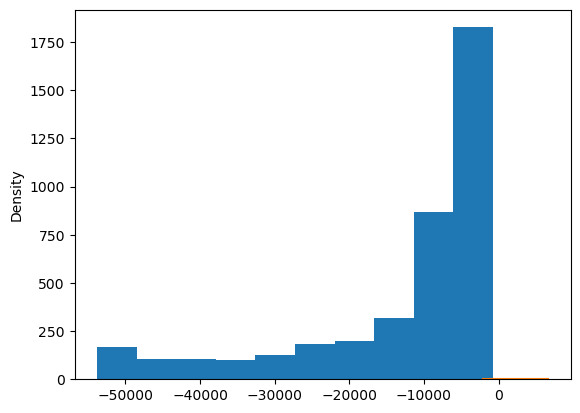

In [79]:
df['Total_E'].hist()
df['Formation_E'].plot(kind='kde')


1. Right-Skewed Distribution of Total_E:


    The histogram of Total_E shows a right-skewed distribution, where most of the nanoparticles have low negative energy values (close to 0), indicating that:
    
        Many configurations are energetically stable: Low (negative) total energy typically indicates stability, so the majority of nanoparticles in the dataset are relatively stable.
        A few configurations have much lower (more negative) total energy, which may indicate highly stable structures.

    
    The tail on the left side of the distribution suggests that there are some nanoparticles with very low total energy (down to around -50,000). These could correspond to:
    
        Nanoparticles with specific structural configurations that are more energetically favorable (e.g., denser, more compact structures).
        Larger particles or ones with specific crystalline features that reduce their overall energy significantly.

Many nanoparticles require low energy to form, meaning they are likely formed under favorable conditions with minimal energy barriers.

A smaller subset of particles has more negative Formation_E, which means they have a lower energy barrier to form from a bulk or reference state, potentially indicating more thermodynamically favorable formations.

Nanoparticles with lower total energy are generally more stable, and the higher density of particles with energy closer to zero means that most configurations in this dataset are not far from neutral in stability.

On the other hand, those with more negative Formation_E values (depending on the distribution) are likely to form easily and remain stable.

In [13]:
df['Total_E'].skew()
df['Formation_E'].kurtosis()


3.1700209224075935

Skewness measures the asymmetry of a distribution.
A skewness of 3.17 indicates that the Total_E distribution is highly positively skewed. This means that the distribution has a long right tail, with more data points concentrated on the left (lower energy values) and fewer, but larger, values on the right (higher total energy values).

In practical terms, this implies that most nanoparticles have low total energy, but a small number of configurations have much higher total energy. These higher-energy configurations could correspond to less stable or rare structural forms.

<Axes: xlabel='N_surface', ylabel='Total_E'>

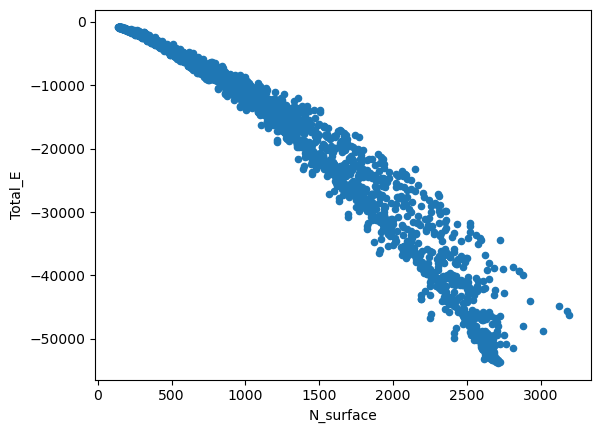

In [14]:
df.plot.scatter(x='N_surface', y='Total_E')


The plot clearly shows a strong negative correlation between N_surface and Total_E.

As the number of surface atoms (N_surface) increases, the Total_E becomes more negative, indicating that larger nanoparticles with more surface atoms have lower total energy and are generally more stable.

Nanoparticles with fewer surface atoms (lower N_surface values) have higher total energy. This makes sense because smaller particles with fewer surface atoms tend to have higher surface-to-volume ratios, leading to higher surface energy and thus higher total energy.

As N_surface increases (larger particles with more atoms on the surface), the total energy decreases, indicating that these particles are more energetically favorable and more stable.

This negative correlation is a known phenomenon in nanomaterials: the larger the particle (more atoms, more surface area), the lower the total energy, and hence, greater stability.

The high density of points suggests that this trend is consistent across the dataset, but there might be some variations in the stability of particles at specific N_surface values (as seen from the scatter in the plot).

/Users/yingzhou/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


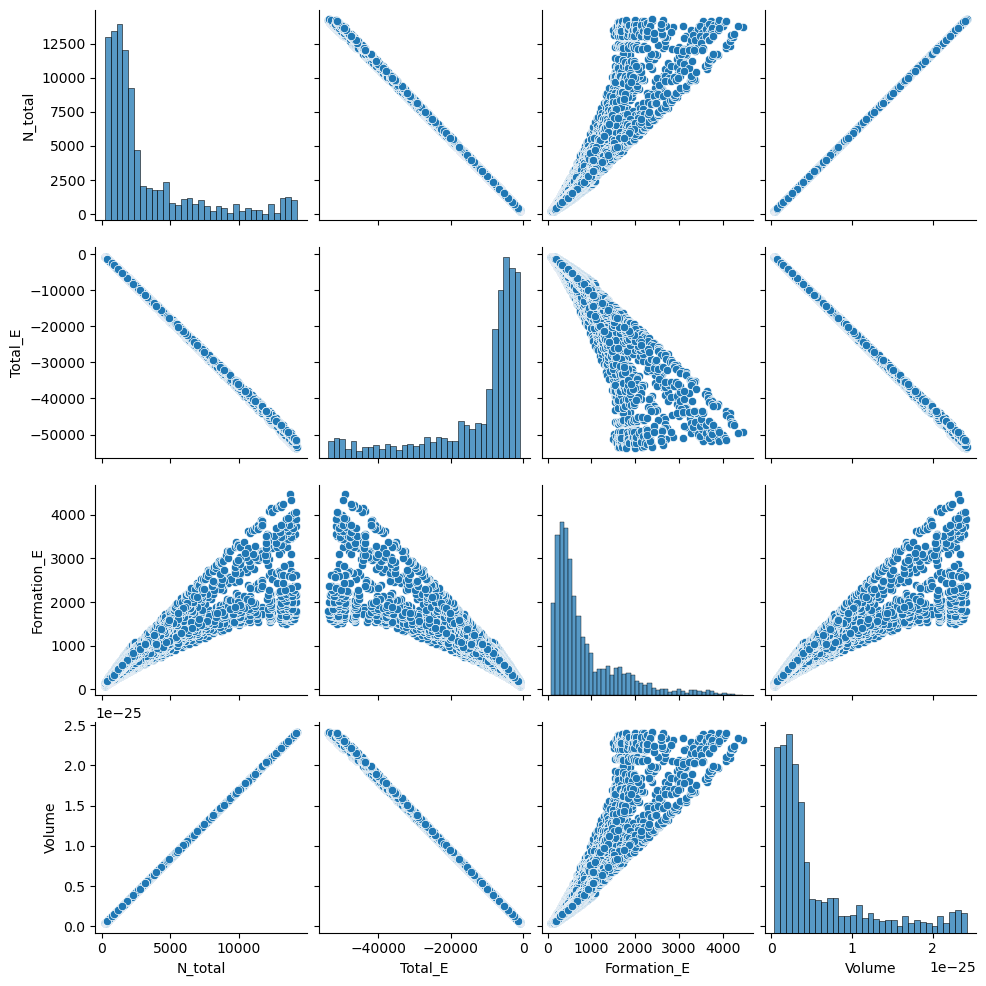

In [15]:
sns.pairplot(df[['N_total', 'Total_E', 'Formation_E', 'Volume']])


1. N_total vs. Total_E:

    There's a strong negative linear correlation between the total number of atoms (N_total) and Total_E. As N_total increases, Total_E becomes more negative, indicating that larger nanoparticles (with more atoms) have lower total energy, which aligns with physical expectations. Larger particles are more stable and have lower total energy due to less influence from surface effects.

2. Formation_E vs. N_total and Total_E:

    Formation_E vs N_total: There's a positive relationship between Formation_E and N_total. Larger particles tend to have higher formation energy, indicating that they require more energy to form.
    Formation_E vs Total_E: There's also a clear relationship between Formation_E and Total_E. Higher formation energies correspond to lower total energy values (more negative), indicating that particles that are harder to form tend to be more stable once formed.

3. Volume vs. N_total:

    There is a near-perfect linear relationship between Volume and N_total. This makes sense because the volume of the nanoparticle should increase with the number of atoms. This also suggests that particle size (volume) is directly proportional to the number of atoms in the particle.

4. Total_E vs. Volume:

    Similarly, there is a strong linear negative correlation between Total_E and Volume. Larger particles (greater volume) tend to have lower total energy, again highlighting that larger nanoparticles are more stable.

Overall Observations:

    Particle Size Dominates Total Energy: Both N_total and Volume are highly correlated with Total_E, which indicates that particle size (in terms of the number of atoms or volume) plays a crucial role in determining the total energy and stability of the nanoparticles.
    Formation Energy Trends: Larger particles tend to have higher formation energies, suggesting that larger nanoparticles require more energy to form but are more stable once formed (with lower total energy).

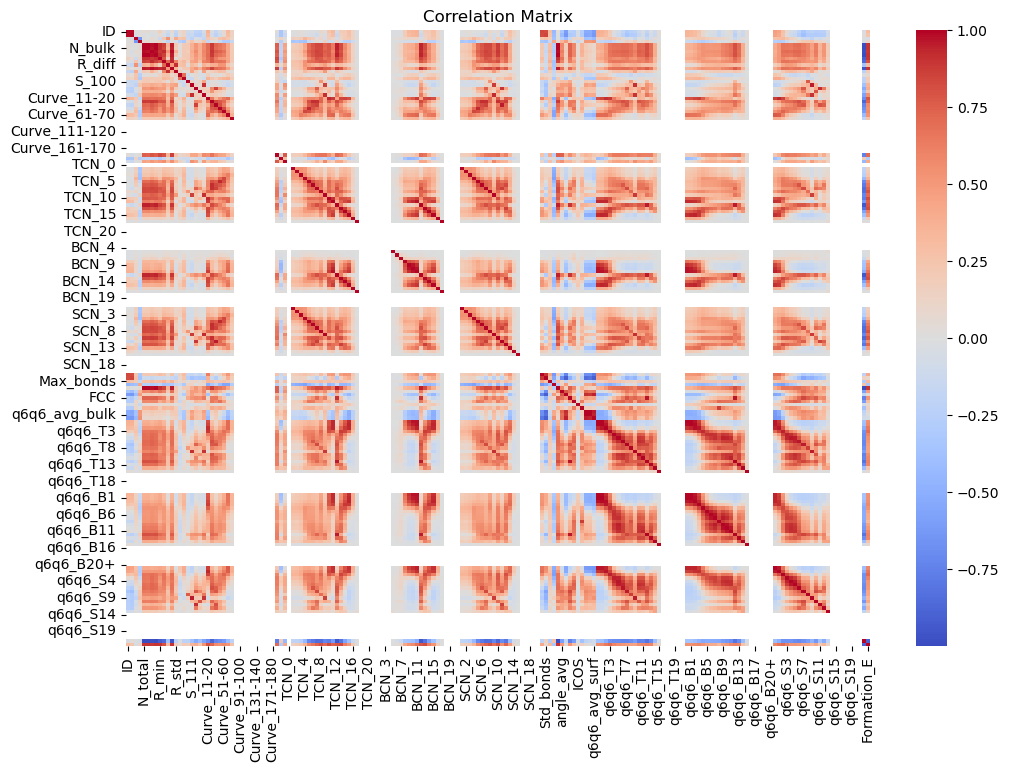

In [16]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap for better visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


1. Strong Correlations:

    N_bulk: This variable shows strong positive correlations with various structural and topological features (e.g., R_diff, surface curvatures, and certain TCN and BCN variables). This suggests that the bulk atom count is highly associated with the structural configuration of the nanoparticles.
    FCC and q6q6 Parameters: The variables related to FCC (Face-Centered Cubic) structure and various q6q6 parameters seem to show notable correlations with other order parameters, which likely indicates a relation between the local symmetry of the nanoparticles and their energetic stability.
    Formation_E: You can see that Formation_E has some correlation with other parameters, suggesting that factors like the number of bonds (Max_bonds) or certain TCN/BCN features influence the energy required to form nanoparticles.

2. Negative Correlations:

    You can observe certain strong negative correlations, especially with N_total and Formation_E. This indicates that larger nanoparticles (those with more atoms) generally require more energy to form.
    Some negative correlations between q6q6 parameters and other structural variables (like angle-related parameters or bond counts) suggest that as local ordering increases, the structure becomes less distorted.

3. Clusters of Correlated Variables:

    The heatmap also shows clusters of features that are strongly correlated with each other. For instance:
        Curvature variables (Curve_11-20, Curve_161-170) are closely related to each other, likely describing similar structural characteristics of the nanoparticle surface.
        TCN and BCN variables (related to topological cluster numbers) show interdependence, likely reflecting how different atom configurations influence overall nanoparticle properties.

4. Outliers in Correlations:

    Formation_E seems to have weaker correlations with some structural features compared to other variables, indicating that formation energy is more influenced by size and symmetry rather than finer structural details.

 ### 2.4 Structural Features Analysis

R_avg (Average radius)
Volume (Nanoparticle volume)
N_surface (Number of surface atoms)
N_total (Total number of atoms)
T (Temperature)
time (Time)

In [21]:
# Selecting relevant columns
features = ['T', 'time', 'R_avg', 'Volume', 'N_surface', 'N_total']
df_selected = df[features]

# Check if there are missing values
print(df_selected.isnull().sum())


T            0
time         0
R_avg        0
Volume       0
N_surface    0
N_total      0
dtype: int64


#### Average Radius, Volume, and Surface Atoms against Time

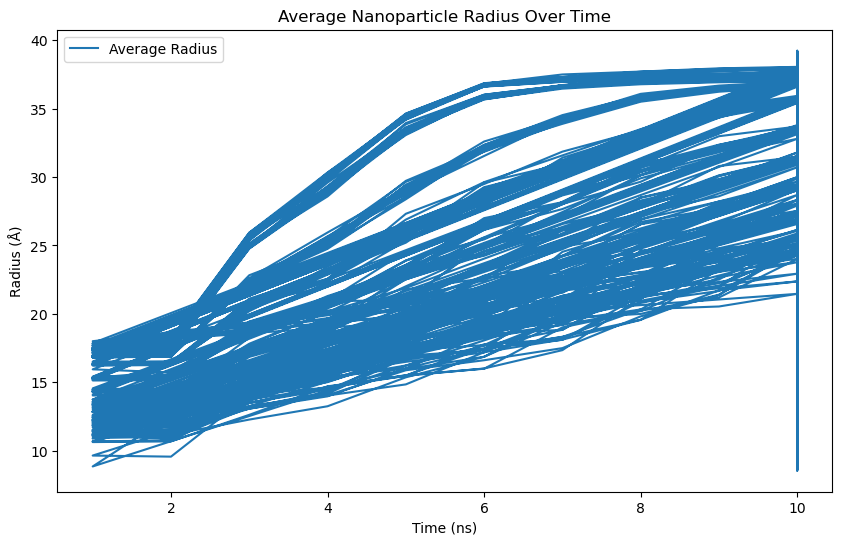

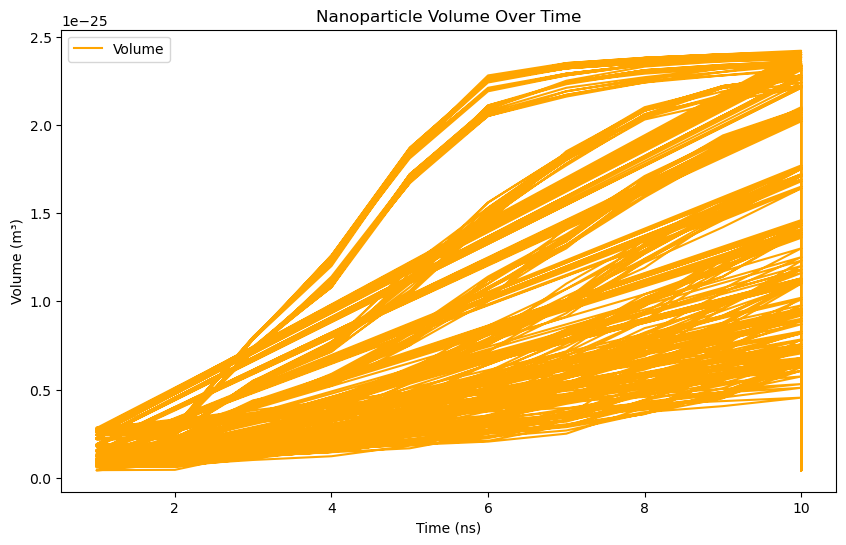

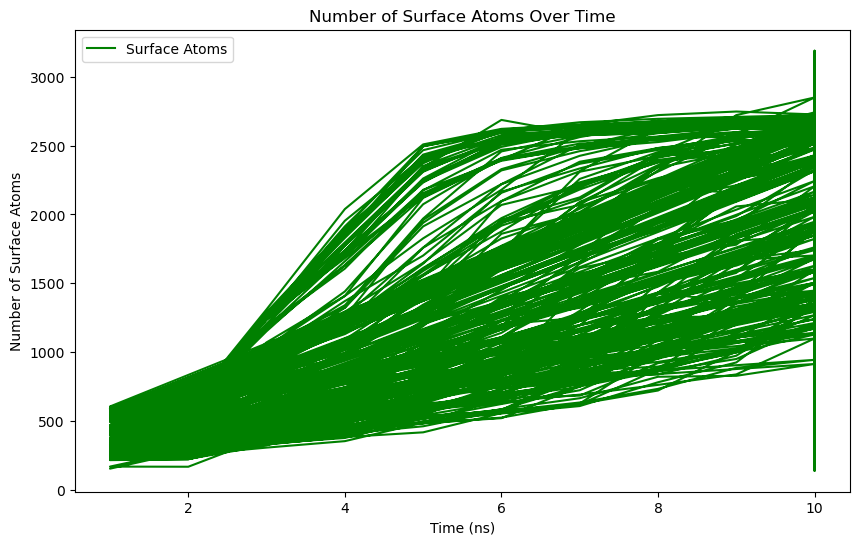

In [22]:
import matplotlib.pyplot as plt

# Plot nanoparticle radius over time
plt.figure(figsize=(10,6))
plt.plot(df_selected['time'], df_selected['R_avg'], label='Average Radius')
plt.xlabel('Time (ns)')
plt.ylabel('Radius (Å)')
plt.title('Average Nanoparticle Radius Over Time')
plt.legend()
plt.show()

# Plot nanoparticle volume over time
plt.figure(figsize=(10,6))
plt.plot(df_selected['time'], df_selected['Volume'], label='Volume', color='orange')
plt.xlabel('Time (ns)')
plt.ylabel('Volume (m³)')
plt.title('Nanoparticle Volume Over Time')
plt.legend()
plt.show()

# Plot surface atoms over time
plt.figure(figsize=(10,6))
plt.plot(df_selected['time'], df_selected['N_surface'], label='Surface Atoms', color='green')
plt.xlabel('Time (ns)')
plt.ylabel('Number of Surface Atoms')
plt.title('Number of Surface Atoms Over Time')
plt.legend()
plt.show()


**Average Nanoparticle Radius Over Time**
The average radius increases steadily over time, with a slight variation across different lines. The general trend shows that the nanoparticle radius increases as time progresses.

Growth Phase: The initial growth phase appears to be steady, with no rapid growth in the early stages (0-2 ns). This suggests a nucleation period where the nanoparticles form at a relatively constant rate.
Later Growth: Between 4-8 ns, there is a more accelerated growth phase. This is likely where the nanoparticles grow more rapidly due to favorable conditions such as increased surface energy or temperature.
Variation Across Samples: Some lines deviate from the main group, which could indicate differences in local conditions or growth rates (e.g., variations in temperature or initial seed size).

The radius grows significantly over time, and the sharp increase indicates a phase where the growth accelerates.

**Nanoparticle Volume Over Time**
The volume increases more rapidly over time compared to the radius. This makes sense because volume scales with the cube of the radius.

Exponential Growth: Since volume grows cubically with radius, the volume trends show a sharp increase as the nanoparticle grows. The volume increase is most pronounced after 4 ns.
Different Growth Rates: The spread of the lines suggests that some nanoparticles experience faster growth compared to others, which could be attributed to local environmental conditions, temperature, or variations in synthesis.
Key Insight: Volume grows faster than the radius, and the sharp growth around 4-8 ns indicates the onset of rapid expansion. This could reflect important physical changes, like coalescence of nanoparticles or a shift in energy-driven growth.

**Number of Surface Atoms Over Time**
The number of surface atoms also increases steadily over time, with a more significant spread in the values than the radius and volume.

Surface Growth: The surface area increases as the nanoparticle grows, and this plot highlights that the surface atoms increase at a rate corresponding to the growth in nanoparticle size.

Importance of Surface Atoms: Surface atoms are critical for catalytic applications, so this rapid increase in surface atoms could make the nanoparticles more effective catalysts over time.

Spread Across Samples: Similar to volume, there's a noticeable spread in the number of surface atoms across different samples, which might indicate different growth environments or varying initial seed sizes.

Key Insight: The sharp increase in surface atoms shows that as nanoparticles grow, the available surface area also increases significantly, which is important for applications where surface-to-volume ratio matters, such as in catalysis.

#### Average Nanoparticle Radius Over Time 

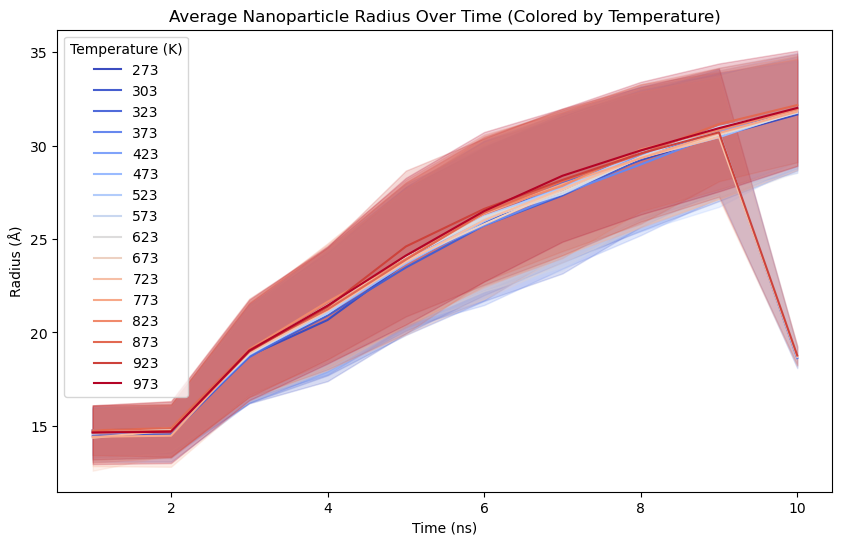

In [24]:
import seaborn as sns

# Plot nanoparticle radius over time with color based on temperature
plt.figure(figsize=(10,6))
sns.lineplot(data=df_selected, x='time', y='R_avg', hue='T', palette='coolwarm', legend='full')
plt.xlabel('Time (ns)')
plt.ylabel('Radius (Å)')
plt.title('Average Nanoparticle Radius Over Time (Colored by Temperature)')
plt.legend(title='Temperature (K)')
plt.show()


The nanoparticle radius consistently increases over time. Higher temperatures (closer to 973 K) result in a more rapid increase in radius, suggesting that temperature accelerates the growth rate of the nanoparticles.

Influence of Temperature: Higher temperatures lead to faster growth, but the overall shape of the growth curve remains similar across different temperatures. Around 6 ns, there is a noticeable sharp change in radius, possibly indicating a phase transition or change in growth conditions.

Key Insight: Higher temperatures lead to larger nanoparticle sizes, which is consistent with the physics of diffusion-limited growth.

#### Mean Structural Features Over Time

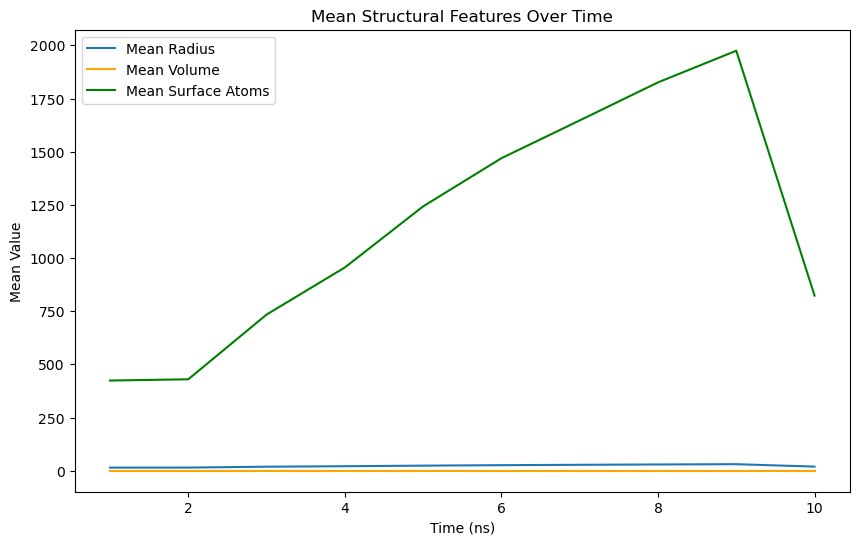

In [25]:
# Group by time and calculate mean
df_mean = df_selected.groupby('time').mean()

# Plot mean radius, volume, and surface atoms over time
plt.figure(figsize=(10,6))
plt.plot(df_mean.index, df_mean['R_avg'], label='Mean Radius')
plt.plot(df_mean.index, df_mean['Volume'], label='Mean Volume', color='orange')
plt.plot(df_mean.index, df_mean['N_surface'], label='Mean Surface Atoms', color='green')
plt.xlabel('Time (ns)')
plt.ylabel('Mean Value')
plt.title('Mean Structural Features Over Time')
plt.legend()
plt.show()


The plot shows the mean values of radius, volume, and the number of surface atoms over time. The most obvious increase is in the number of surface atoms, which scales much faster compared to the radius and volume.

Surface Atoms: The rapid increase in surface atoms suggests that the nanoparticle surface grows substantially as the nanoparticle increases in size. This could be important in applications where surface area is a critical factor (e.g., catalysis).
Volume and Radius: While the radius and volume also increase, their growth is smoother and more linear compared to the sharp increase in surface atoms.
Key Insight: The number of surface atoms grows faster than other features, possibly because larger nanoparticles expose more surface as they grow.

#### Smoothed Nanoparticle Radius Over Time

/Users/yingzhou/anaconda3/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


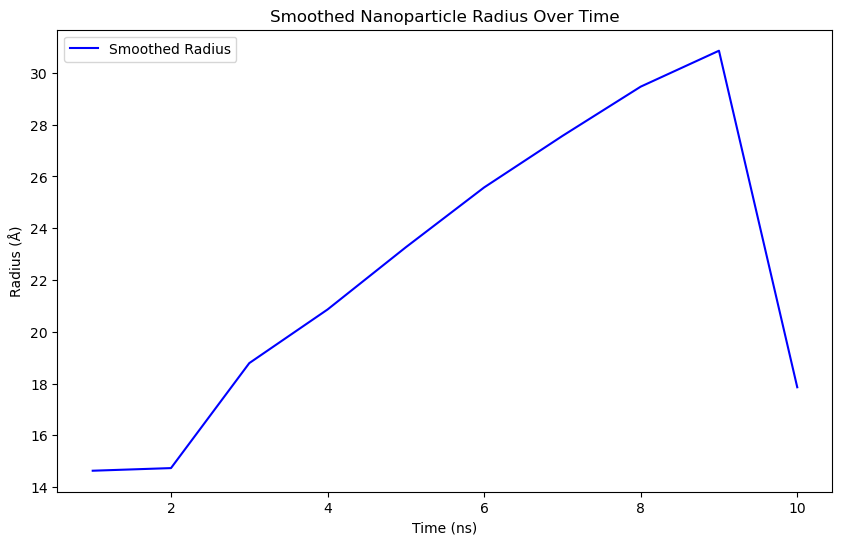

In [80]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# Apply LOWESS smoothing to the radius data
smoothed_radius = lowess(df_selected['R_avg'], df_selected['time'], frac=0.1)

# Plot smoothed radius over time
plt.figure(figsize=(10,6))
plt.plot(smoothed_radius[:, 0], smoothed_radius[:, 1], label='Smoothed Radius', color='blue')
plt.xlabel('Time (ns)')
plt.ylabel('Radius (Å)')
plt.title('Smoothed Nanoparticle Radius Over Time')
plt.legend()
plt.show()


The smoothed curve shows a gradual increase in radius over time, with a more apparent sharp increase around 6-8 ns.

Growth Regime: The smoother curve helps to observe that the nanoparticle radius grows steadily until it reaches a plateau or growth saturation around 8 ns.
Key Insight: The smoothed data suggests that there might be a saturation point where the nanoparticle stops growing significantly in radius after around 8 ns.

#### Radius and Volume Over Time

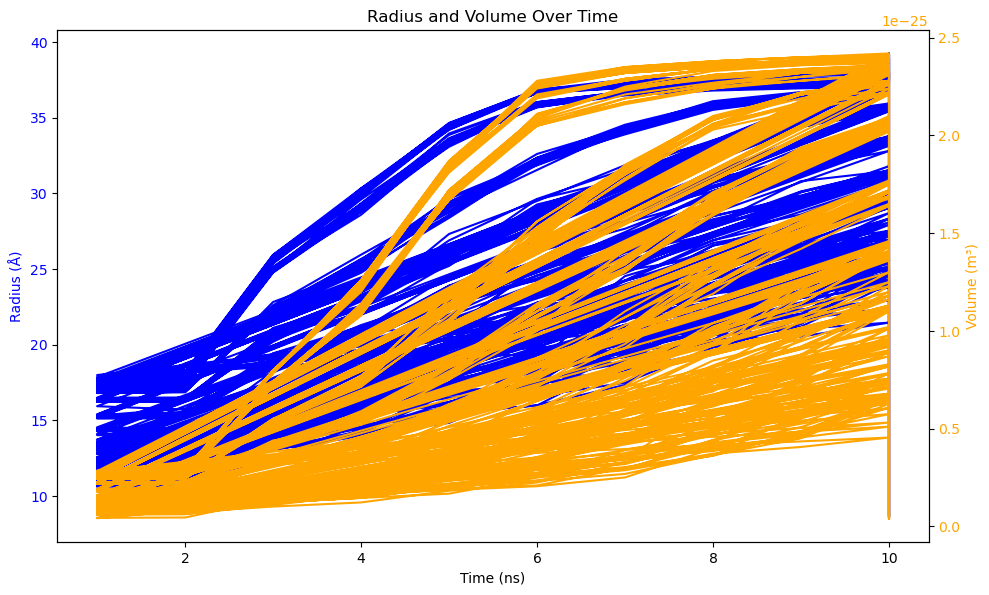

In [27]:
# Combined plot with different y-axes for Radius and Volume
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.set_xlabel('Time (ns)')
ax1.set_ylabel('Radius (Å)', color='blue')
ax1.plot(df_selected['time'], df_selected['R_avg'], color='blue', label='Radius')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for Volume
ax2 = ax1.twinx()
ax2.set_ylabel('Volume (m³)', color='orange')
ax2.plot(df_selected['time'], df_selected['Volume'], color='orange', label='Volume')
ax2.tick_params(axis='y', labelcolor='orange')

fig.tight_layout()
plt.title('Radius and Volume Over Time')
plt.show()


The blue line represents the radius, and the orange line represents the volume. Both increase over time, but the volume’s increase appears sharper, which makes sense given that volume scales with the cube of the radius.

Nonlinear Growth: The volume increases more rapidly than the radius, which is consistent with geometrical scaling. This supports that nanoparticle volume grows exponentially relative to the radius.
Key Insight: Volume grows faster than the radius, which may affect physical properties like density or mass.

#### Structural Features Over Time (Subset: First 5 ns)

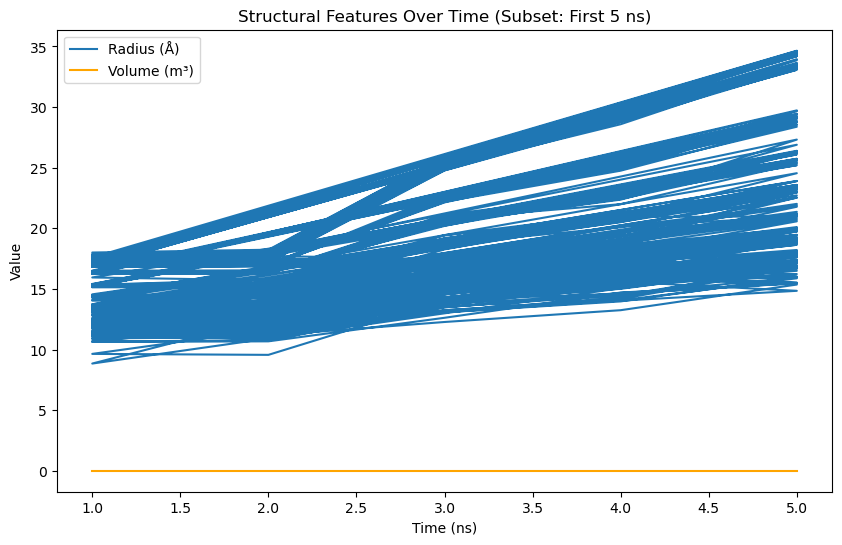

In [31]:
# Filter dataset for specific time range (e.g., first 5 ns)
df_subset = df_selected[df_selected['time'] <= 5]

# Plot for this subset
plt.figure(figsize=(10,6))
plt.plot(df_subset['time'], df_subset['R_avg'], label='Radius (Å)')
plt.plot(df_subset['time'], df_subset['Volume'], label='Volume (m³)', color='orange')
plt.xlabel('Time (ns)')
plt.ylabel('Value')
plt.title('Structural Features Over Time (Subset: First 5 ns)')
plt.legend()
plt.show()


For the first 5 ns, the growth in both radius and volume appears steady, but not as pronounced as in the complete dataset.

Initial Growth: During the early stages of nanoparticle formation (first 5 ns), the growth is relatively slow, suggesting that the nucleation phase is dominating in this period.
Key Insight: Growth accelerates significantly after 5 ns, indicating that the first 5 ns may correspond to a nucleation period where growth is slow.

#### Pairplot of Structural Features and Temperature

/Users/yingzhou/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


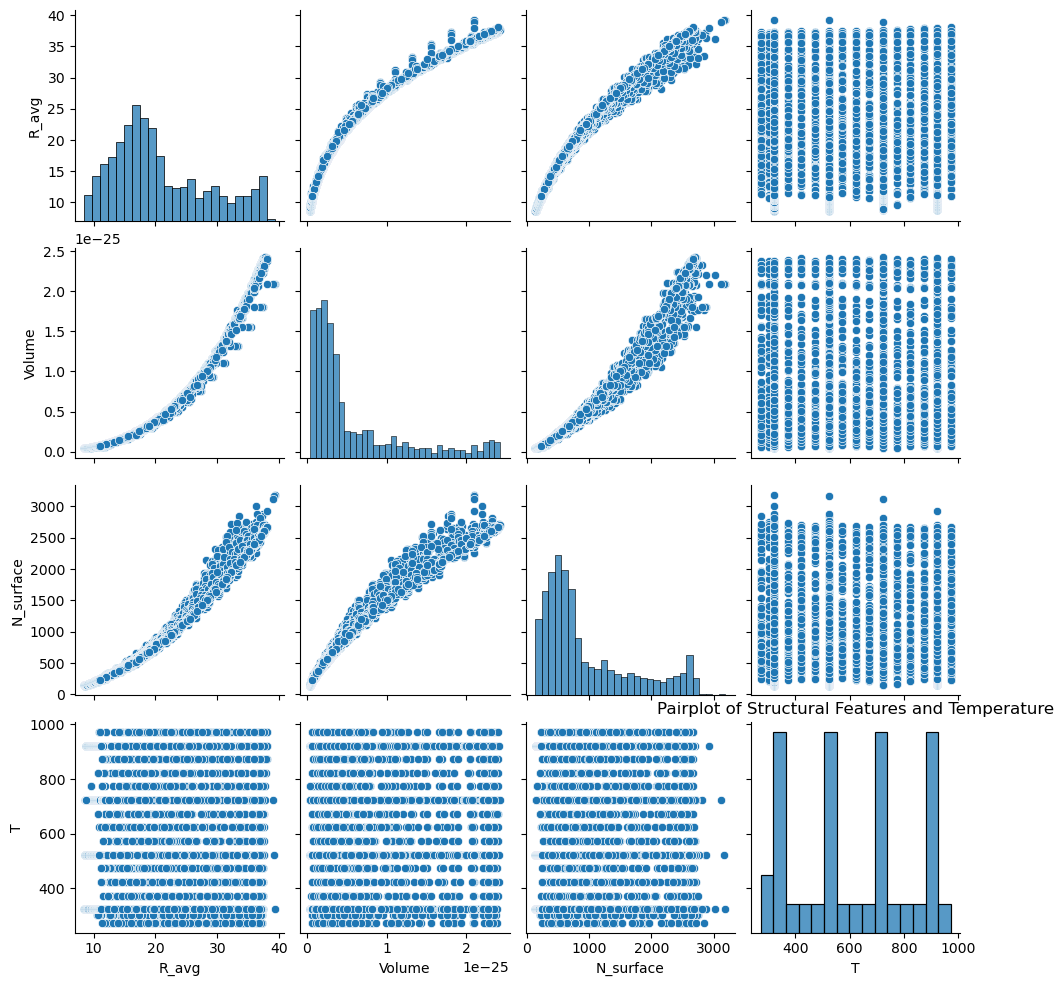

In [29]:
sns.pairplot(df_selected[['R_avg', 'Volume', 'N_surface', 'T']])
plt.title('Pairplot of Structural Features and Temperature')
plt.show()


Strong correlations between radius, volume, and surface atoms.
Different temperatures appear scattered across all these variables.

Correlation Between Features: There is a strong positive correlation between the radius, volume, and surface atoms. This is expected since larger nanoparticles will naturally have larger volumes and more surface atoms.

Temperature Independence: Temperature appears to be relatively independent of radius, volume, and surface atoms, although its influence is mostly reflected in how fast these properties increase over time.

Key Insight: Structural features are tightly correlated, but temperature seems to influence the rate of growth rather than the absolute values at a specific point.

#### Visualize Trends Over Temperature

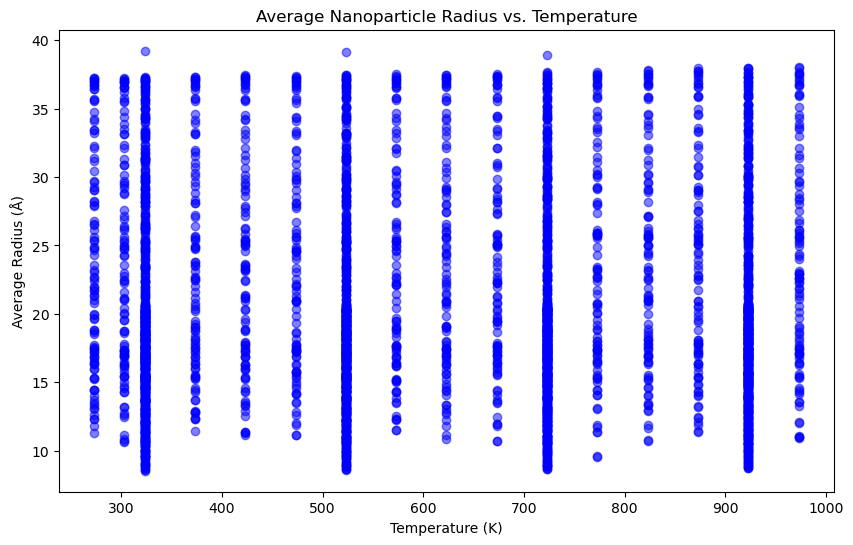

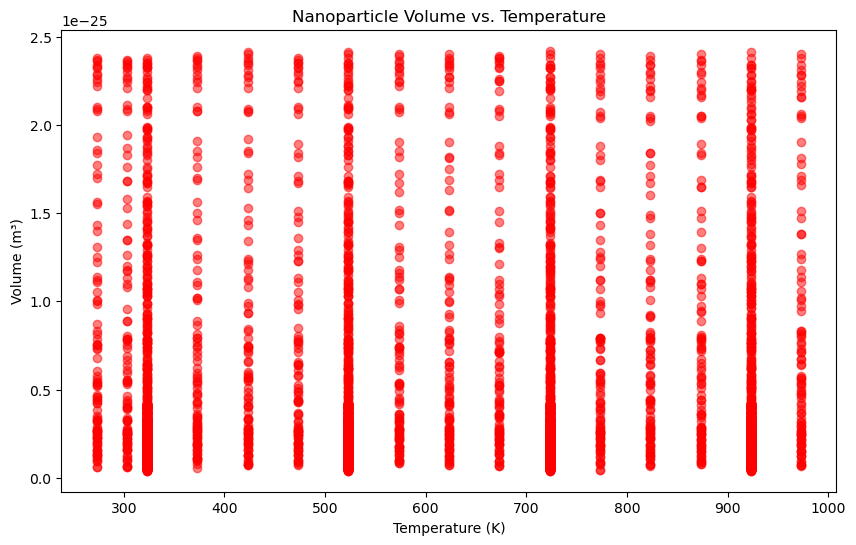

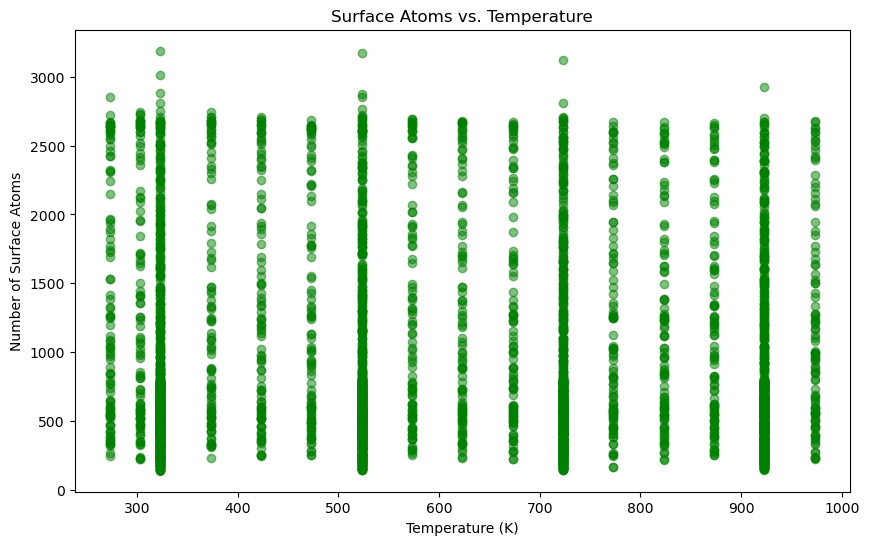

In [23]:
# Scatter plot for radius vs. temperature
plt.figure(figsize=(10,6))
plt.scatter(df_selected['T'], df_selected['R_avg'], c='blue', alpha=0.5)
plt.xlabel('Temperature (K)')
plt.ylabel('Average Radius (Å)')
plt.title('Average Nanoparticle Radius vs. Temperature')
plt.show()

# Scatter plot for volume vs. temperature
plt.figure(figsize=(10,6))
plt.scatter(df_selected['T'], df_selected['Volume'], c='red', alpha=0.5)
plt.xlabel('Temperature (K)')
plt.ylabel('Volume (m³)')
plt.title('Nanoparticle Volume vs. Temperature')
plt.show()

# Scatter plot for surface atoms vs. temperature
plt.figure(figsize=(10,6))
plt.scatter(df_selected['T'], df_selected['N_surface'], c='green', alpha=0.5)
plt.xlabel('Temperature (K)')
plt.ylabel('Number of Surface Atoms')
plt.title('Surface Atoms vs. Temperature')
plt.show()


Average Nanoparticle Radius vs. Temperature:
The spread of data points suggests that temperature alone is not the primary factor controlling the nanoparticle radius in a straightforward way. We can observe that for each temperature, there are nanoparticles with a wide range of radii. This indicates that other factors (such as initial seed size, growth duration, or local environment) may be influencing the radius as well.

Nanoparticle Volume vs. Temperature
The nanoparticle volume shows a wide range at each temperature, similar to radius and surface atoms. Some nanoparticles reach volumes close to 2.5×10−25 m32.5×10−25m3

Temperature alone does not directly determine nanoparticle size, volume, or surface atoms in a clear linear manner, but it influences the distribution of sizes, allowing for a broader range of growth outcomes at higher temperatures.

Factors like nucleation, coalescence, diffusion, and supersaturation likely play key roles in the growth dynamics, and temperature may influence these processes rather than directly driving growth.

Higher temperatures may result in faster diffusion and more varied growth rates, leading to more significant differences in nanoparticle sizes and structures.

#### Correlation Analysis

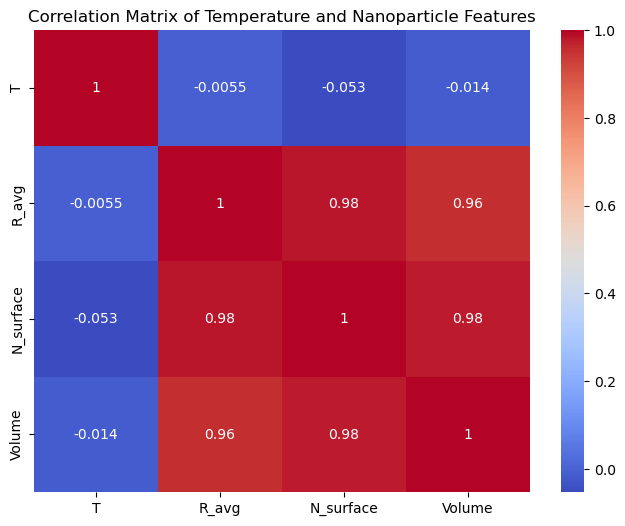

In [33]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Example: Correlation analysis of the dataset
corr_matrix = df[['T', 'R_avg', 'N_surface', 'Volume']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Temperature and Nanoparticle Features')
plt.show()


There is a strong positive correlation between nanoparticle radius (R_avg), number of surface atoms (N_surface), and volume. This is expected, as these structural features are naturally linked: as the radius increases, so do the surface atoms and volume.
Temperature (T) shows little to no direct correlation with radius, surface atoms, or volume (very low correlation values).

This indicates that temperature does not directly dictate the nanoparticle size, surface atoms, or volume. Instead, it may act as a secondary factor that influences growth indirectly, such as through diffusion or nucleation rates.
Key Insight: The primary drivers of nanoparticle size are likely the growth mechanism and time, with temperature playing an auxiliary role in regulating how quickly these processes happen.

#### Growth Rate Analysis

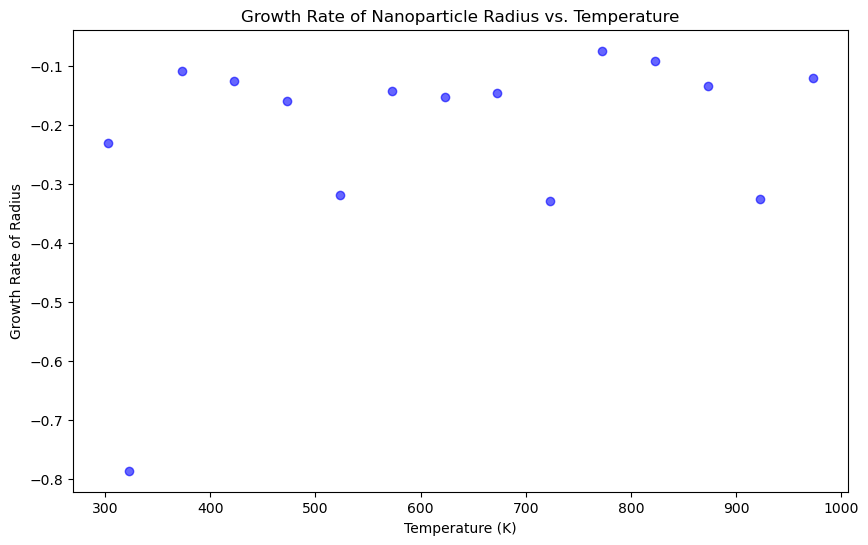

In [81]:
# Compute growth rate of radius with respect to temperature
df['radius_growth_rate'] = df['R_avg'].diff() / df['T'].diff()

# Plot growth rate vs temperature
plt.figure(figsize=(10,6))
plt.scatter(df['T'], df['radius_growth_rate'], color='blue', alpha=0.6)
plt.xlabel('Temperature (K)')
plt.ylabel('Growth Rate of Radius')
plt.title('Growth Rate of Nanoparticle Radius vs. Temperature')
plt.show()


The growth rate varies with temperature, but it does not follow a clear linear trend. At some temperatures (e.g., 300 K and 600 K), the growth rate is lower, while at other temperatures (e.g., 400 K to 800 K), the growth rate is slightly higher and more consistent.

This non-linear behavior suggests that other factors, such as diffusion rates, initial conditions, and possibly saturation of growth at different stages, may be interacting with temperature.
The growth rate around 800 K to 900 K seems higher, indicating that diffusion-limited growth processes could be more active at these temperatures.
Key Insight: Temperature likely affects the growth kinetics (how fast atoms diffuse and attach to the nanoparticle surface), but does not completely govern the growth behavior in a simple way.

####  Surface Area to Volume Ratio vs. Temperature

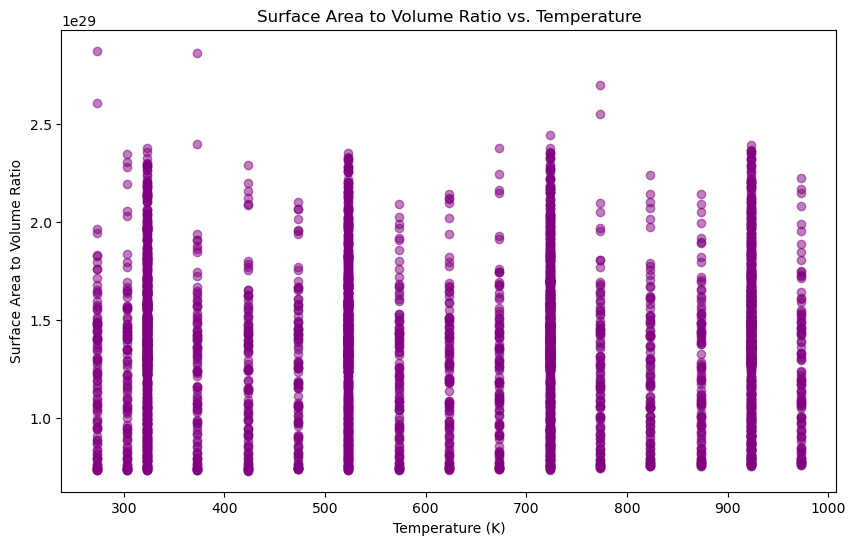

In [36]:
# Calculate surface area (approximate) and surface area-to-volume ratio
df['surface_area'] = 4 * 3.1416 * (df['R_avg'] ** 2)
df['SA_to_V_ratio'] = df['surface_area'] / df['Volume']

# Plot surface area-to-volume ratio vs temperature
plt.figure(figsize=(10,6))
plt.scatter(df['T'], df['SA_to_V_ratio'], color='purple', alpha=0.5)
plt.xlabel('Temperature (K)')
plt.ylabel('Surface Area to Volume Ratio')
plt.title('Surface Area to Volume Ratio vs. Temperature')
plt.show()


The surface area-to-volume ratio shows variation across different temperatures, with some higher values at lower temperatures (300-400 K) and wider distribution at higher temperatures.

Lower temperatures appear to lead to a higher surface area-to-volume ratio, which is important for applications like catalysis where surface area is critical.
Higher temperatures (600 K and above) show more diversity in this ratio, suggesting that at higher temperatures, growth mechanisms may favor larger volume nanoparticles with relatively smaller surface areas.
Key Insight: The surface area-to-volume ratio is more variable at higher temperatures, suggesting that temperature increases may lead to larger nanoparticles with proportionally smaller surface areas.

## 3 Structural Features Models

### 3.1 Clustering of Nanoparticle Growth by Temperature and Radius

/Users/yingzhou/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


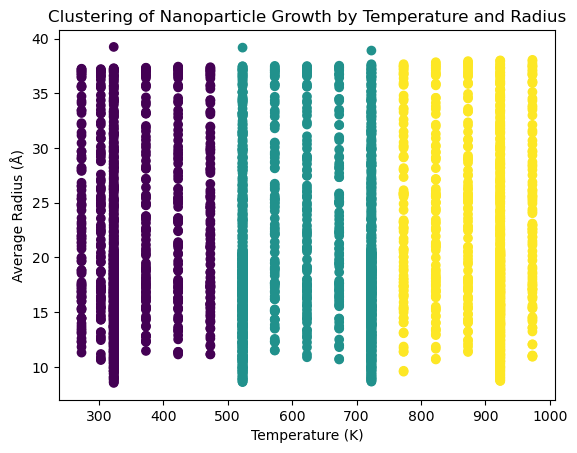

In [37]:
from sklearn.cluster import KMeans

# Example: Clustering data based on radius and temperature
X = df[['T', 'R_avg']].dropna()
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(X)

# Plot clusters
plt.scatter(df['T'], df['R_avg'], c=df['cluster'], cmap='viridis')
plt.xlabel('Temperature (K)')
plt.ylabel('Average Radius (Å)')
plt.title('Clustering of Nanoparticle Growth by Temperature and Radius')
plt.show()


The clustering analysis shows distinct groups of nanoparticles based on their temperature and radius. You can see at least three main clusters represented by different colors (e.g., purple, teal, and yellow clusters).

Cluster 1 (purple): Lower temperature range (300-500 K) generally results in smaller nanoparticles with radii around 10-20 Å.
Cluster 2 (teal): Middle temperatures (500-700 K) lead to a mix of medium-sized nanoparticles, with more spread in radii (15-30 Å).
Cluster 3 (yellow): Higher temperatures (700-1000 K) generate a broader range of larger nanoparticles, with radii ranging from 20 Å to 40 Å.
Key Insight: Different growth mechanisms may dominate in each temperature range, with low temperatures favoring smaller particles and high temperatures favoring a broader size distribution.

Temperature is not the sole driver of nanoparticle size:

    The correlation matrix shows that temperature is weakly correlated with radius, volume, and surface atoms. This suggests that while temperature influences growth, it doesn’t dictate nanoparticle size in isolation.

Growth rate variation with temperature:

    The growth rate of nanoparticle radius does vary with temperature, but the non-linear behavior suggests the influence of other processes (e.g., diffusion, aggregation, or surface energy effects) that interact with temperature to determine the final nanoparticle size.

Surface Area-to-Volume ratio fluctuates with temperature:

    Lower temperatures tend to produce nanoparticles with higher surface area-to-volume ratios, which might be beneficial for applications that require a large surface area (e.g., catalysis).

Distinct temperature-dependent growth mechanisms:

    The clustering analysis reveals distinct temperature regimes: lower temperatures result in smaller nanoparticles, while higher temperatures generate larger particles with more variation in size.

### 3.2 Growth Mechanism Investigation:

#### A. Diffusion-Limited Growth (DLG):

In diffusion-limited growth, the nanoparticle's growth rate is proportional to the flux of atoms or molecules diffusing toward the particle's surface.

**Equation**: 
$$ R(t) \propto \sqrt{t} $$

Here, \( R(t) \) is the radius at time \( t \). The nanoparticle radius grows as the square root of time.

---

#### B. Aggregation Model:

In aggregation-driven growth, small clusters of particles merge to form larger nanoparticles. This process tends to produce rapid growth in particle size, particularly after a critical size is reached.

**Equation**: 
$$ R(t) \propto t^x $$

The value of \( x \) depends on the exact aggregation mechanism. For example, if the process is dominated by random collisions (Brownian motion), \( x \) can be around 1.

---

#### C. Ostwald Ripening:

Ostwald ripening occurs when larger particles grow at the expense of smaller particles due to differences in chemical potential (larger particles have lower chemical potential and are more stable).

**Equation**: 
$$ R(t) \propto t^{1/3} $$

In this model, the particle size grows with the cube root of time as small particles dissolve and redeposit onto larger ones.


### Diffusion-Limited Growth Model

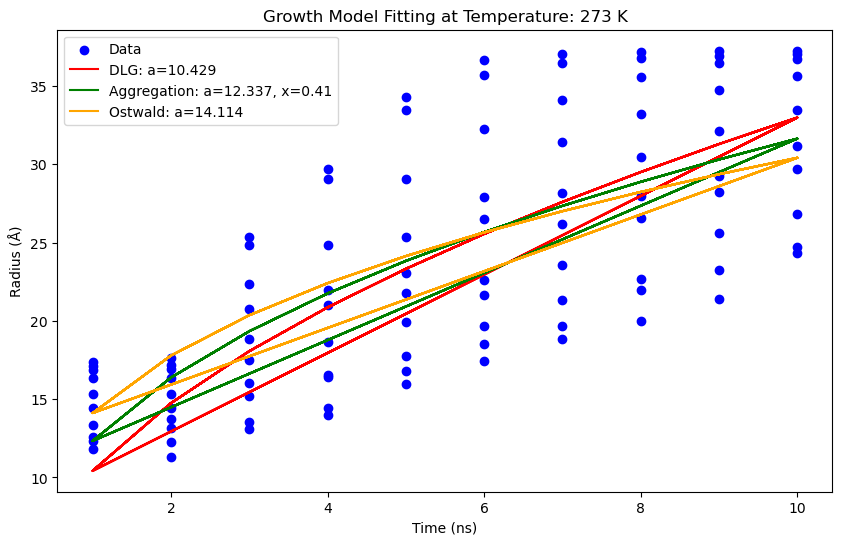

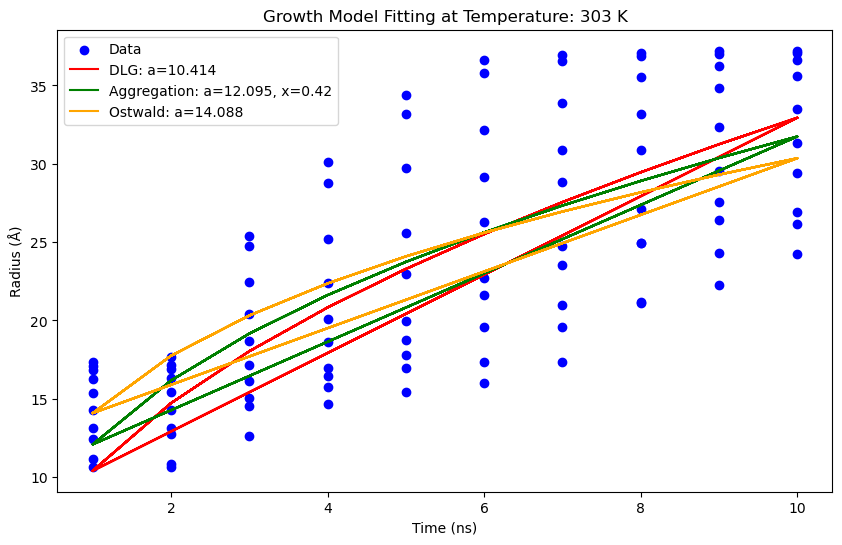

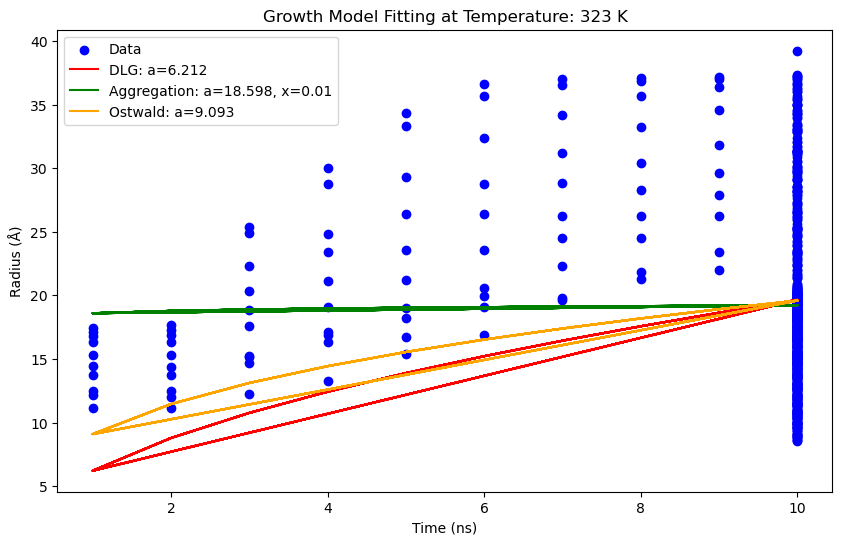

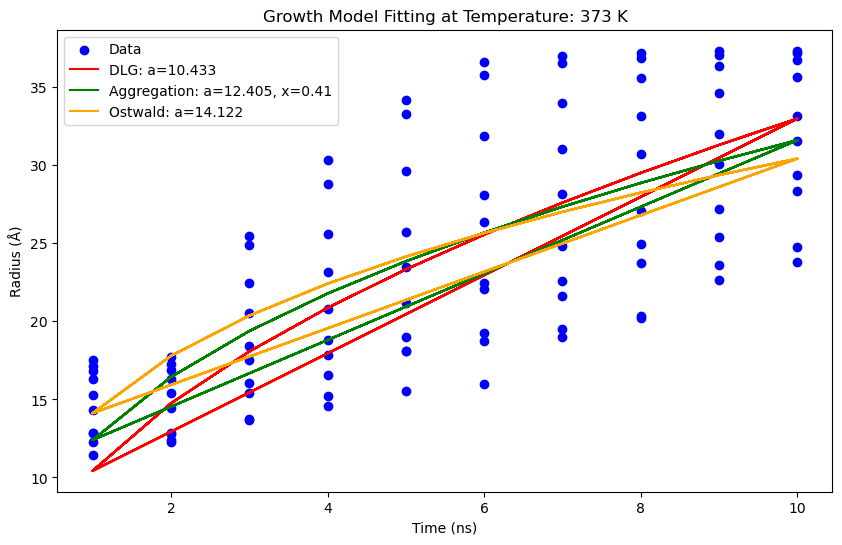

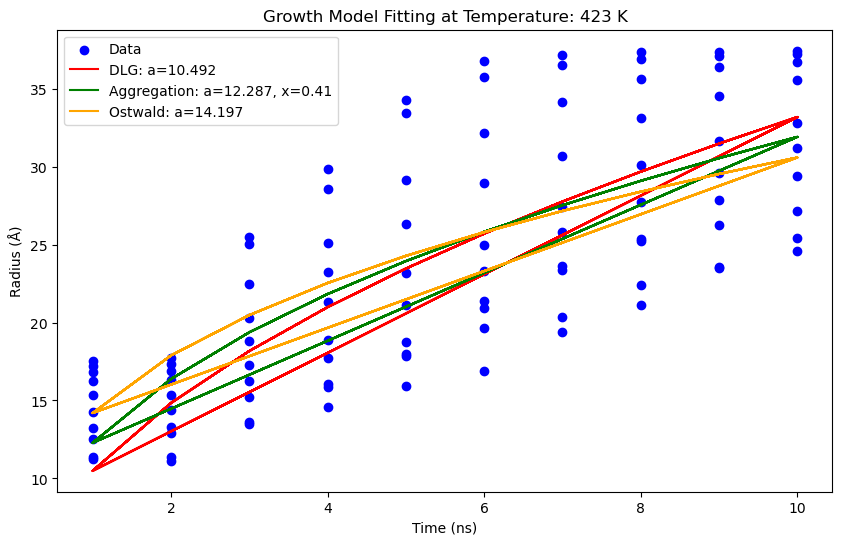

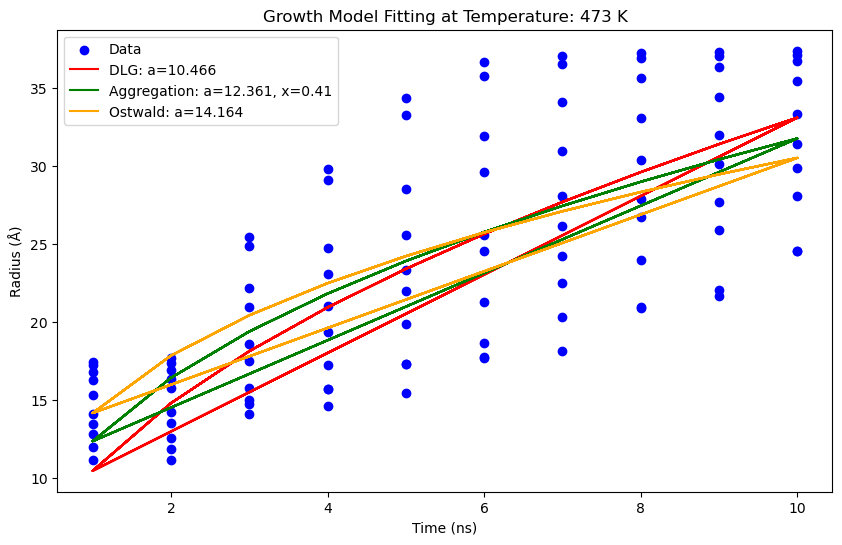

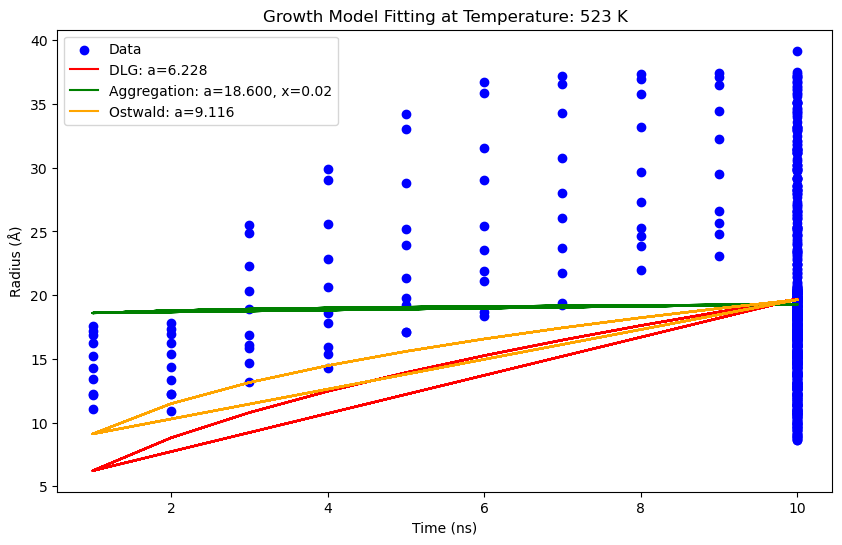

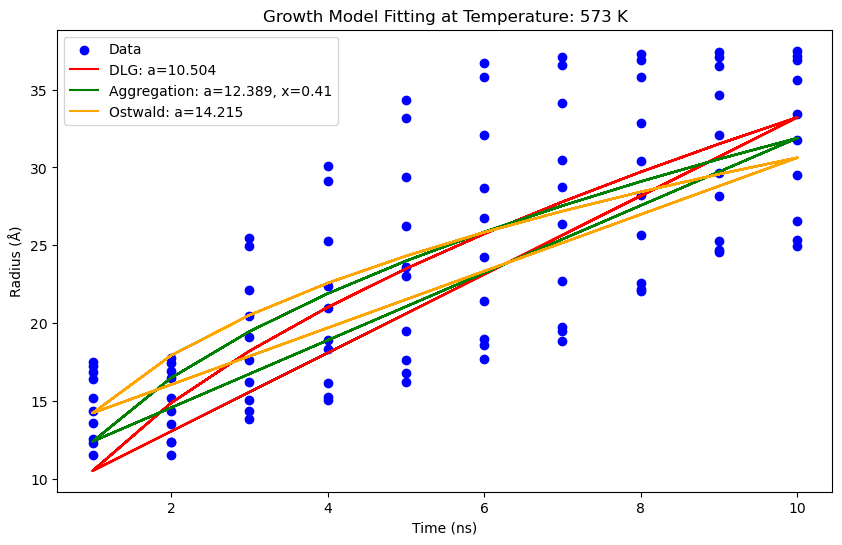

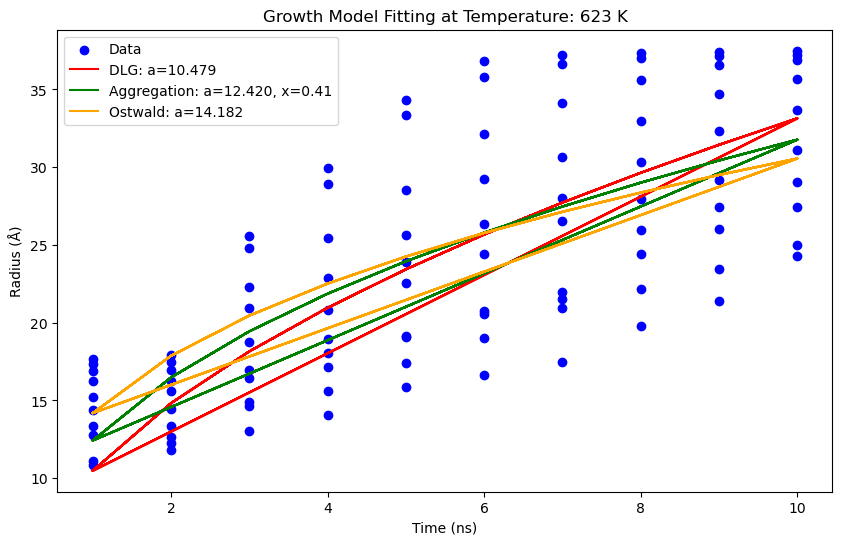

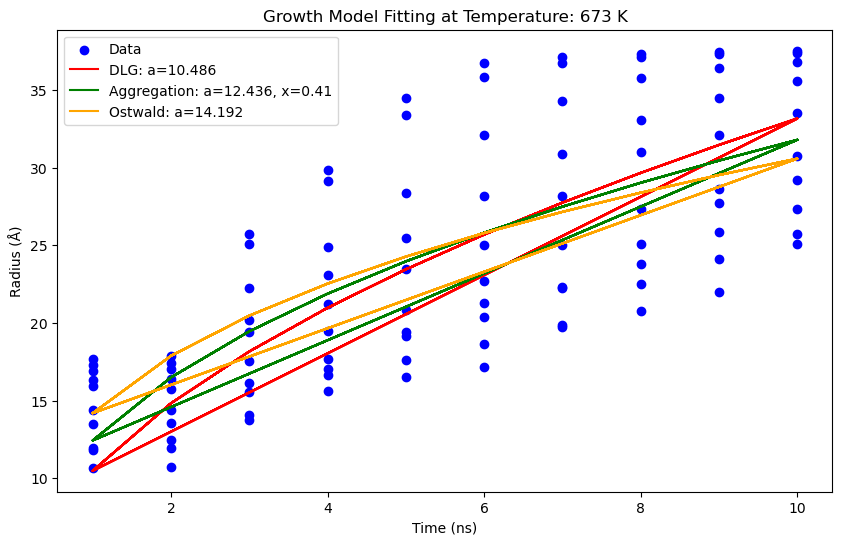

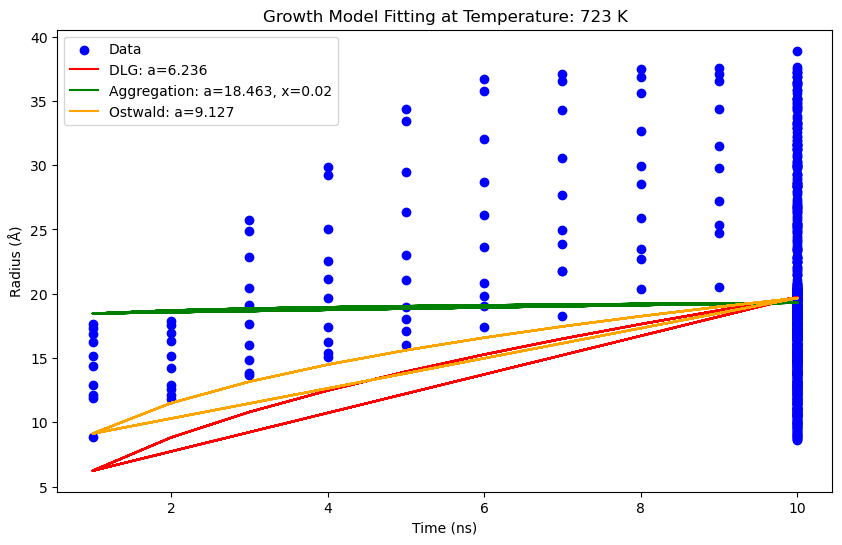

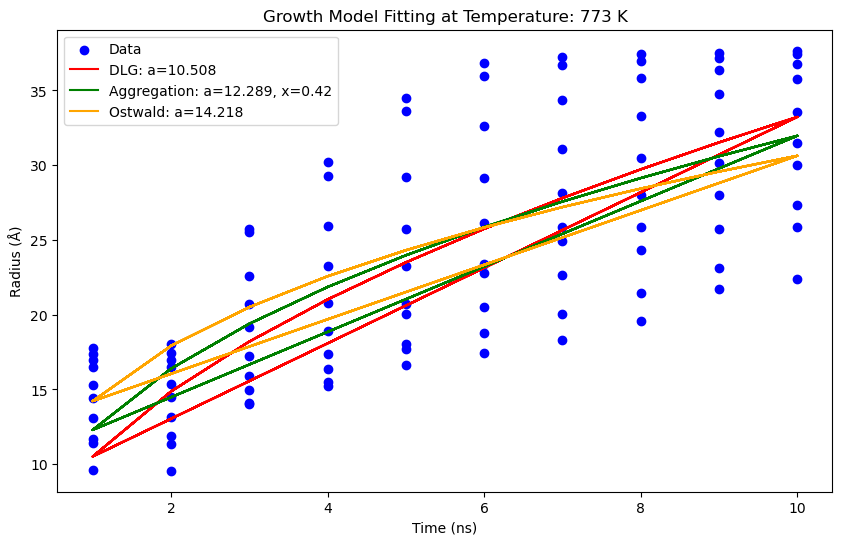

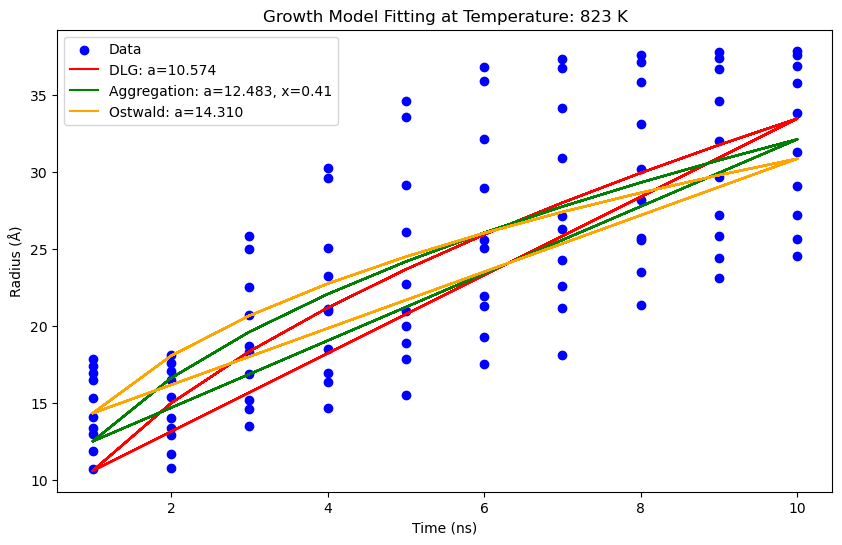

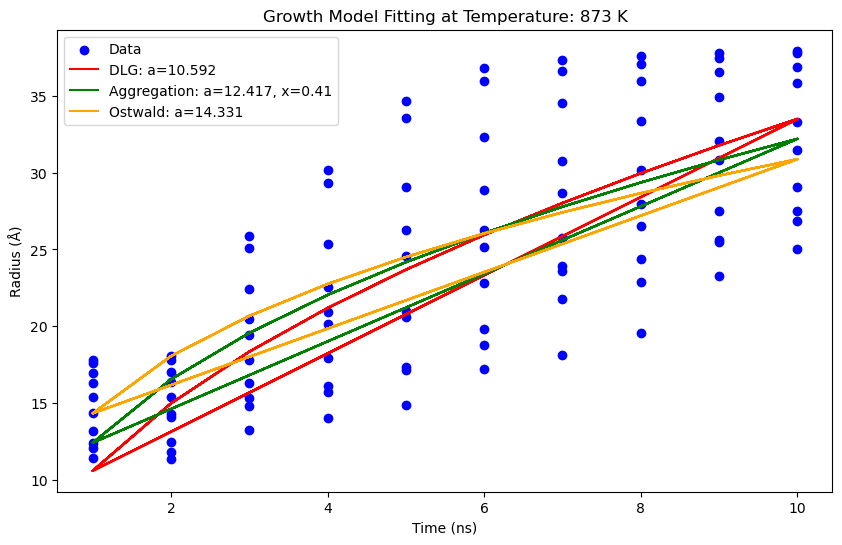

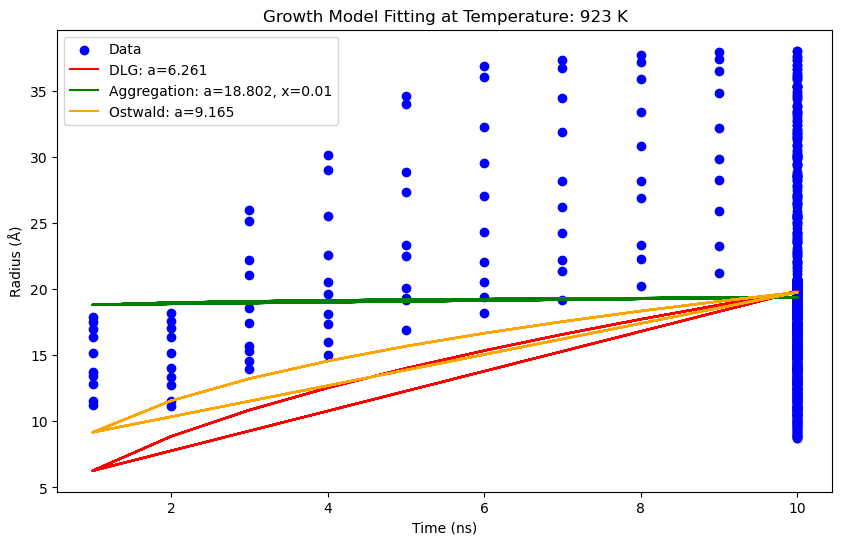

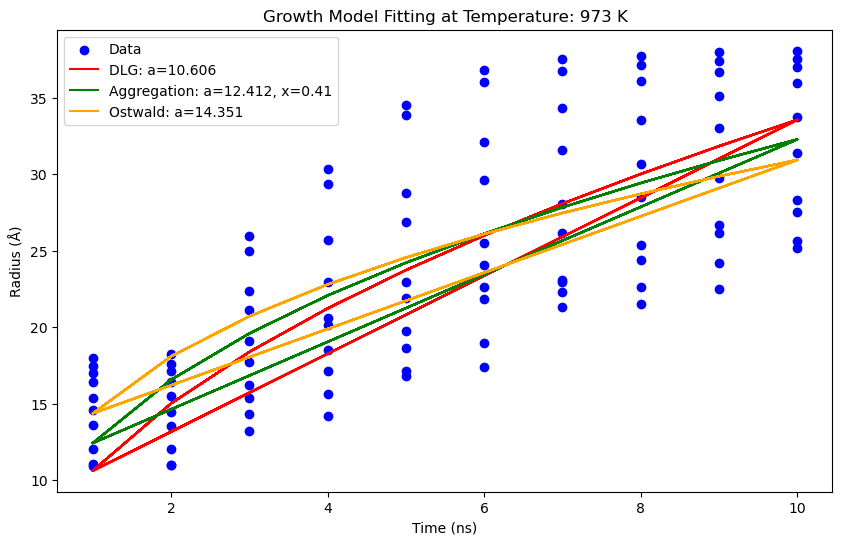

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Growth models
def dlg_model(t, a):
    return a * np.sqrt(t)  # Diffusion-limited growth model

def aggregation_model(t, a, x):
    return a * t**x  # Aggregation model with exponent x

def ostwald_model(t, a):
    return a * t**(1/3)  # Ostwald ripening model

# Prepare data for fitting
# Assume df contains 'time', 'R_avg' (radius), and 'T' (temperature)
df_grouped = df.groupby('T')  # Group data by temperature

# Function to fit models to data for each temperature group
def fit_models(grouped_data):
    for temperature, group in grouped_data:
        time = group['time']
        radius = group['R_avg']

        # Fit diffusion-limited growth model
        dlg_params, _ = curve_fit(dlg_model, time, radius)
        a_dlg = dlg_params[0]

        # Fit aggregation model
        agg_params, _ = curve_fit(aggregation_model, time, radius, p0=[1, 1])
        a_agg, x_agg = agg_params

        # Fit Ostwald ripening model
        ostwald_params, _ = curve_fit(ostwald_model, time, radius)
        a_ostwald = ostwald_params[0]

        # Plot data and fits
        plt.figure(figsize=(10,6))
        plt.scatter(time, radius, label='Data', color='blue')

        plt.plot(time, dlg_model(time, a_dlg), label=f'DLG: a={a_dlg:.3f}', color='red')
        plt.plot(time, aggregation_model(time, a_agg, x_agg), label=f'Aggregation: a={a_agg:.3f}, x={x_agg:.2f}', color='green')
        plt.plot(time, ostwald_model(time, a_ostwald), label=f'Ostwald: a={a_ostwald:.3f}', color='orange')

        plt.xlabel('Time (ns)')
        plt.ylabel('Radius (Å)')
        plt.title(f'Growth Model Fitting at Temperature: {temperature} K')
        plt.legend()
        plt.show()

# Call function to fit models to each temperature group
fit_models(df_grouped)


In [40]:
# Assuming 'df' is your DataFrame with 'time' and 'R_avg' (radius) columns
time = df['time'].values  # Extracting the time column
radius = df['R_avg'].values  # Extracting the radius column


In [42]:
from scipy.optimize import curve_fit

# Define the diffusion-limited growth model
def dlg_model(t, a):
    return a * np.sqrt(t)

# Fit the DLG model to the data
dlg_params, _ = curve_fit(dlg_model, time, radius)
a_dlg = dlg_params[0]  # Get the 'a' parameter


In [43]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate the predicted radius using the fitted DLG model
radius_predicted = dlg_model(time, a_dlg)

# Calculate R² and RMSE
r2_dlg = r2_score(radius, radius_predicted)
rmse_dlg = np.sqrt(mean_squared_error(radius, radius_predicted))

# Print the results
print(f"Diffusion-Limited Growth: R² = {r2_dlg}, RMSE = {rmse_dlg}")


Diffusion-Limited Growth: R² = -0.24381280860600985, RMSE = 8.4868931146471


An R² score less than 0 means the model is performing worse than a horizontal line (the mean value of the data). In this case, the model is not capturing the trend in the data, indicating that the DLG model does not fit the observed nanoparticle growth well.

RMSE (Root Mean Square Error) represents the average deviation between the predicted values and the observed data. A high RMSE means there is a large difference between the predicted nanoparticle radius and the actual radius, further suggesting that the DLG model isn't a good fit for this dataset.

### Fitting the Aggregation and Ostwald Ripening Models:

In [44]:
# Aggregation model: R(t) = a * t^x
def aggregation_model(t, a, x):
    return a * t**x

# Fit aggregation model to data
agg_params, _ = curve_fit(aggregation_model, time, radius, p0=[1, 1])  # p0 is the initial guess
a_agg, x_agg = agg_params

# Predict radius using aggregation model
radius_agg_pred = aggregation_model(time, a_agg, x_agg)

# Calculate R² and RMSE for aggregation model
r2_agg = r2_score(radius, radius_agg_pred)
rmse_agg = np.sqrt(mean_squared_error(radius, radius_agg_pred))

print(f"Aggregation Model: R² = {r2_agg}, RMSE = {rmse_agg}")


Aggregation Model: R² = 0.01514661721273125, RMSE = 7.551913566584458


R² = 0.0151: This is a very low R² value, meaning that the model only explains about 1.5% of the variance in the data. While it is positive, it still suggests that the aggregation model does not capture the nanoparticle growth behavior well.

RMSE = 7.55: This value is slightly lower than the RMSE of the Diffusion-Limited Growth (DLG) model (RMSE ≈ 8.49), but still quite high, indicating significant deviations between the predicted and actual radii.

In [46]:
# Ostwald ripening model: R(t) = a * t^(1/3)
def ostwald_model(t, a):
    return a * t**(1/3)

# Fit Ostwald model to data
ostwald_params, _ = curve_fit(ostwald_model, time, radius)
a_ostwald = ostwald_params[0]

# Predict radius using Ostwald model
radius_ostwald_pred = ostwald_model(time, a_ostwald)

# Calculate R² and RMSE for Ostwald model
r2_ostwald = r2_score(radius, radius_ostwald_pred)
rmse_ostwald = np.sqrt(mean_squared_error(radius, radius_ostwald_pred))

print(f"Ostwald Ripening: R² = {r2_ostwald}, RMSE = {rmse_ostwald}")


Ostwald Ripening: R² = -0.09992317363899783, RMSE = 7.980909686049003


R² = -0.0999: A negative R² value indicates that the Ostwald ripening model is a poor fit for the data. The model performs worse than simply predicting the mean of the data, indicating that Ostwald ripening is unlikely to be the dominant growth mechanism in this case.

RMSE = 7.98: This RMSE is also quite high, reinforcing that the model is not capturing the observed nanoparticle growth accurately.

None of the models (Diffusion-Limited Growth, Aggregation, or Ostwald Ripening) provide a good fit for your data based on the R² and RMSE scores.

The best model so far (Aggregation) only explains 1.5% of the variance, and all models show high RMSE, suggesting they are not accurately predicting the growth dynamics of the nanoparticles.

None of the models (Diffusion-Limited Growth, Aggregation, or Ostwald Ripening) provide a good fit for your data based on the R² and RMSE scores.
The best model so far (Aggregation) only explains 1.5% of the variance, and all models show high RMSE, suggesting they are not accurately predicting the growth dynamics of the nanoparticles.

**Reasons for Poor Model Fits:**

The growth of your nanoparticles might involve **multiple mechanisms** occurring simultaneously (e.g., nucleation, aggregation, diffusion-limited growth) that are not well captured by these simple models. The models used assume a single, dominant mechanism, but in real-world systems, growth might involve more complex interactions or phase transitions that are not accounted for here.

Nanoparticle growth could involve **different phases**, such as an initial nucleation phase followed by rapid growth or aggregation. The current models assume a single, continuous growth process, which may not be valid. A multi-phase model or piecewise fitting might be necessary, where different growth mechanisms are applied to different parts of the time series.

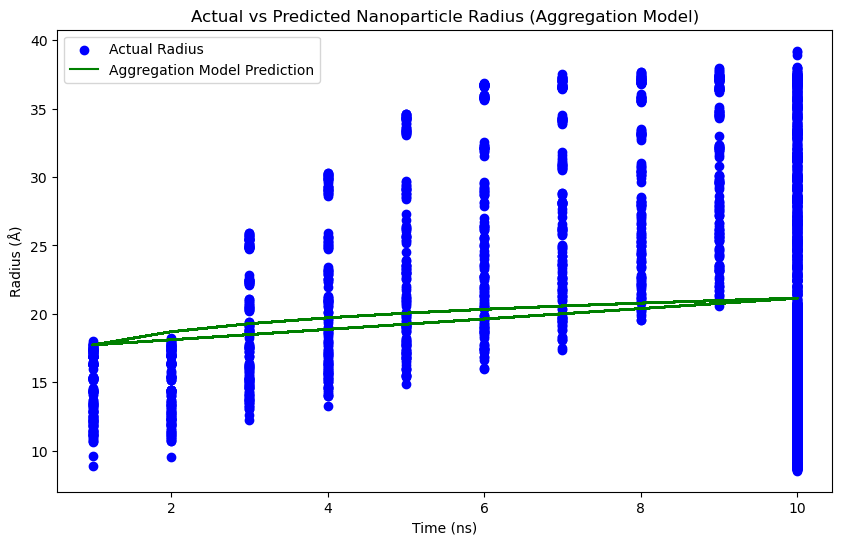

In [47]:
# Plot actual vs predicted for Aggregation model
plt.figure(figsize=(10,6))
plt.scatter(time, radius, label='Actual Radius', color='blue')
plt.plot(time, radius_agg_pred, label='Aggregation Model Prediction', color='green')
plt.xlabel('Time (ns)')
plt.ylabel('Radius (Å)')
plt.title('Actual vs Predicted Nanoparticle Radius (Aggregation Model)')
plt.legend()
plt.show()


The actual radius data (blue dots) shows considerable variation over time, with some samples exhibiting much larger radii than others. This variability is common in experimental data due to factors like stochastic aggregation behavior or experimental noise.

The Aggregation Model seems to predict a slow, steady increase in nanoparticle radius over time, as indicated by the green line. However, the model's predictions are significantly below the range of many actual data points.

This might suggest that the current aggregation model doesn't fully capture the rapid or varied growth of nanoparticles seen in the actual data. Nanoparticle aggregation might not follow the exact pattern assumed by this model, especially if certain random or non-linear growth events (like rapid clustering) are not captured.

### 3.3 Random Forest Regression Model

In [48]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Prepare the data
X = df[['time']].values  # Features (time)
y = df['R_avg'].values   # Target variable (radius)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Random Forest Regressor: R² = 0.26438819405848357, RMSE = 6.6799039299023635


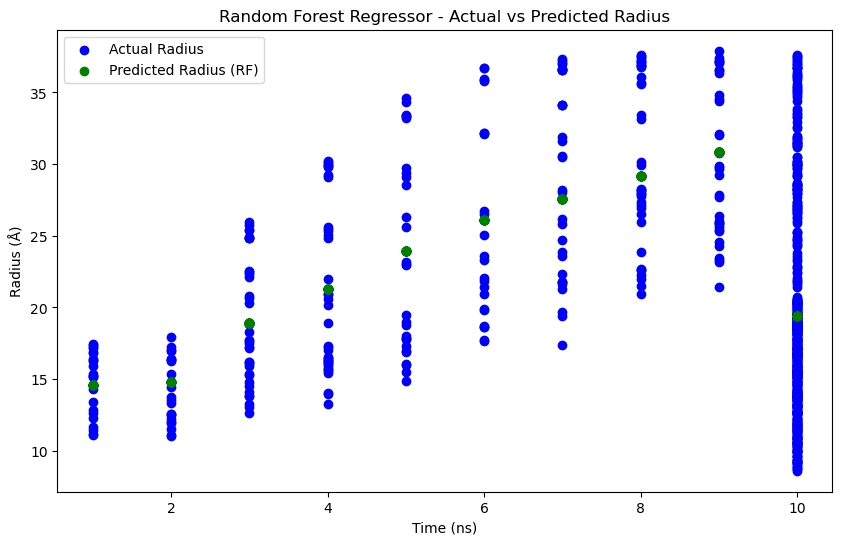

In [49]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the performance of the model
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest Regressor: R² = {r2_rf}, RMSE = {rmse_rf}")

# Plot the predictions vs actual values
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, label='Actual Radius', color='blue')
plt.scatter(X_test, y_pred_rf, label='Predicted Radius (RF)', color='green')
plt.xlabel('Time (ns)')
plt.ylabel('Radius (Å)')
plt.title('Random Forest Regressor - Actual vs Predicted Radius')
plt.legend()
plt.show()


### 3.4 Gradient Boosting Regression Model

Gradient Boosting Regressor: R² = 0.2640912423537005, RMSE = 6.681252065358039


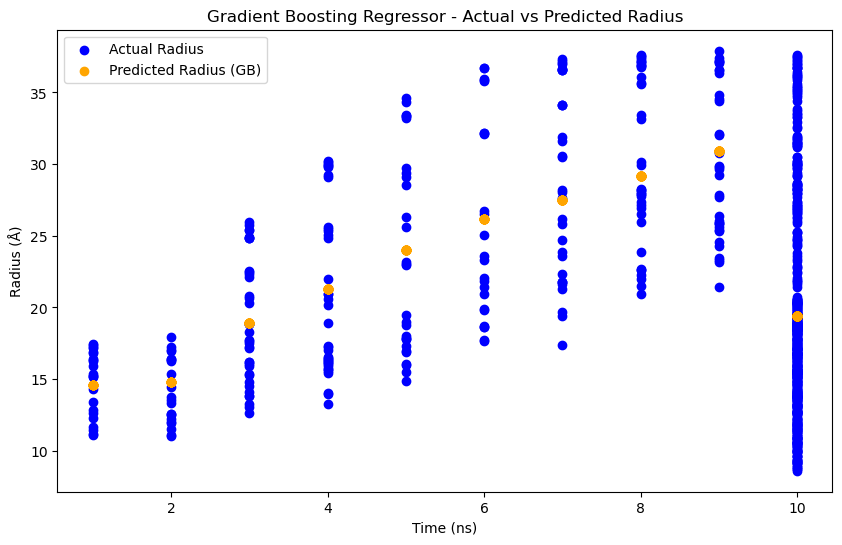

In [50]:
# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on the training data
gb_model.fit(X_train, y_train)

# Predict on the test data
y_pred_gb = gb_model.predict(X_test)

# Evaluate the performance of the model
r2_gb = r2_score(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))

print(f"Gradient Boosting Regressor: R² = {r2_gb}, RMSE = {rmse_gb}")

# Plot the predictions vs actual values
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, label='Actual Radius', color='blue')
plt.scatter(X_test, y_pred_gb, label='Predicted Radius (GB)', color='orange')
plt.xlabel('Time (ns)')
plt.ylabel('Radius (Å)')
plt.title('Gradient Boosting Regressor - Actual vs Predicted Radius')
plt.legend()
plt.show()


In [51]:
from sklearn.model_selection import RandomizedSearchCV

# Define a parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomizedSearchCV for Random Forest
rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid_rf, n_iter=10, cv=3, random_state=42, n_jobs=-1)

# Fit the model to the training data
rf_random.fit(X_train, y_train)

# Get the best parameters
print(f"Best parameters for Random Forest: {rf_random.best_params_}")

# Evaluate the tuned model
y_pred_rf_tuned = rf_random.predict(X_test)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)
rmse_rf_tuned = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned))

print(f"Tuned Random Forest Regressor: R² = {r2_rf_tuned}, RMSE = {rmse_rf_tuned}")


Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 20}
Tuned Random Forest Regressor: R² = 0.2643350157285608, RMSE = 6.6801453749909685


### 3.5 Feature Selection

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming 'df_selected' contains the relevant features and 'target' contains the target values (e.g., R_avg or another variable)
X = df_selected.drop(columns=['R_avg'])  # Replace 'R_avg' with the target feature name if different
y = df_selected['R_avg']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model_tuned = RandomForestRegressor(n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_depth=20, random_state=42)

# Train the model on the training data
rf_model_tuned.fit(X_train, y_train)


RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=5,
                      n_estimators=200, random_state=42)

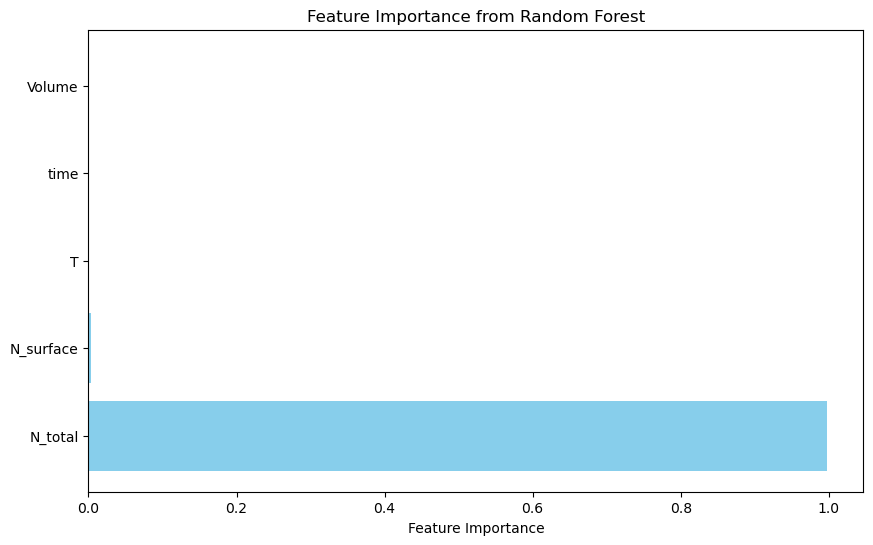

     Feature  Importance
4    N_total    0.997040
3  N_surface    0.002762
0          T    0.000142
1       time    0.000056
2     Volume    0.000000


In [54]:
# After training the Random Forest model, you can get the feature importance
importances = rf_model_tuned.feature_importances_

# Create a DataFrame to display feature importance
feature_names = X.columns  # Names of the features (without the target)
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

# Display the top features
print(feature_importance_df.head(10))  # Show the top 10 features


N_total (number of total atoms): The model has identified this feature as overwhelmingly important, suggesting that the total number of atoms has the most predictive power when it comes to explaining the target variable (e.g., nanoparticle radius, if that's your target).

N_surface (number of surface atoms): This feature has a very small influence on the model, contributing only around 0.27% to the predictions.

Temperature (T), time, and Volume: These features have very low importance, with Volume showing 0% importance. This suggests that they are not contributing meaningfully to the predictions in the current model.

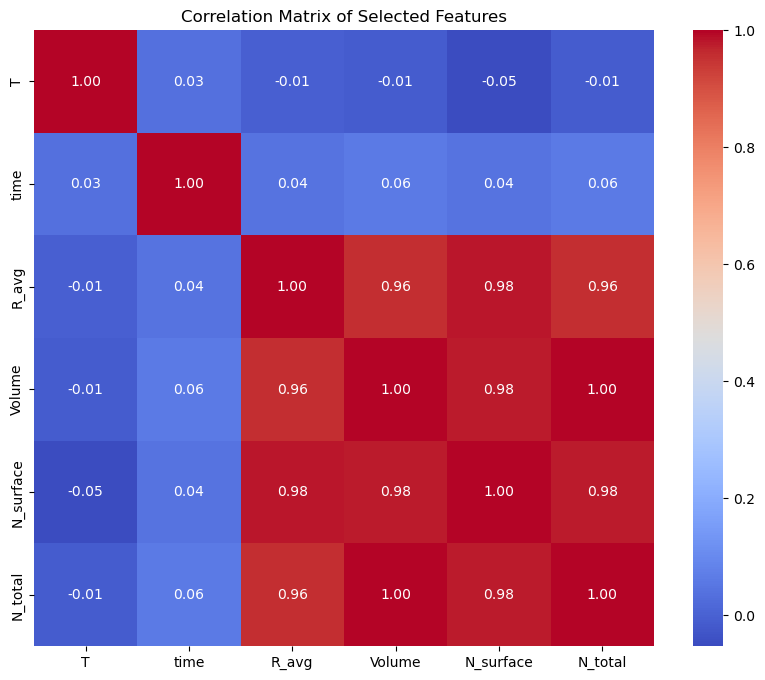

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df_selected.corr()

# Plot the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Selected Features')
plt.show()


N_total, N_surface, Volume, and R_avg:

    These features are all highly correlated with each other:
        N_total vs N_surface: Correlation ~0.98
        N_total vs Volume: Correlation ~1.00
        R_avg vs N_surface: Correlation ~0.98
        R_avg vs Volume: Correlation ~0.96
    This high correlation indicates that these features are likely redundant, meaning they all convey very similar information about the nanoparticle's size and growth. For example, if you know N_total (the number of total atoms), you can almost predict the Volume and R_avg (average radius).



### 3.6 Random Forest Regression Model Update

#### Surface area-to-volume ratio: 

In [58]:
# Using .loc to avoid the SettingWithCopyWarning
df_selected.loc[:, 'SA_to_V_ratio'] = df_selected['N_surface'] / df_selected['Volume']


#### Interaction terms: 

In [59]:
# Interaction terms
df_selected.loc[:, 'T_N_total'] = df_selected['T'] * df_selected['N_total']


In [60]:
# Drop 'N_total' and retrain the model
X_reduced = df_selected.drop(columns=['N_total'])  # Drop the dominating feature

# Split the data and train the Random Forest model again
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
rf_model_reduced = RandomForestRegressor(n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_depth=20, random_state=42)
rf_model_reduced.fit(X_train_red, y_train_red)

# Check the new feature importance
importances_reduced = rf_model_reduced.feature_importances_
feature_names_reduced = X_reduced.columns
feature_importance_df_reduced = pd.DataFrame({'Feature': feature_names_reduced, 'Importance': importances_reduced})
feature_importance_df_reduced = feature_importance_df_reduced.sort_values(by='Importance', ascending=False)

print(feature_importance_df_reduced)


         Feature    Importance
2          R_avg  9.999882e-01
4      N_surface  1.068120e-05
5  SA_to_V_ratio  7.778096e-07
0              T  2.522111e-07
6      T_N_total  9.739423e-08
1           time  3.673697e-08
3         Volume  0.000000e+00


In [61]:
# Drop 'N_total' from the feature set
features = ['time', 'T', 'N_surface', 'Volume', 'SA_to_V_ratio']  # Exclude N_total
X_reduced = df[features].values
y = df['R_avg'].values   # Target variable (radius)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
from sklearn.ensemble import RandomForestRegressor
rf_model_reduced = RandomForestRegressor(n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_depth=20, random_state=42)
rf_model_reduced.fit(X_train, y_train)

# Predict on the test data
y_pred_reduced = rf_model_reduced.predict(X_test)

# Evaluate the performance
from sklearn.metrics import r2_score, mean_squared_error
r2_reduced = r2_score(y_test, y_pred_reduced)
rmse_reduced = np.sqrt(mean_squared_error(y_test, y_pred_reduced))

print(f"Reduced Model (No N_total): R² = {r2_reduced}, RMSE = {rmse_reduced}")

# Check the feature importance again
importances_reduced = rf_model_reduced.feature_importances_
feature_importance_df_reduced = pd.DataFrame({'Feature': features, 'Importance': importances_reduced})
feature_importance_df_reduced = feature_importance_df_reduced.sort_values(by='Importance', ascending=False)

print(feature_importance_df_reduced)


Reduced Model (No N_total): R² = 0.997718968121632, RMSE = 0.37197311236831726
         Feature  Importance
2      N_surface    0.955324
4  SA_to_V_ratio    0.043130
1              T    0.001419
0           time    0.000128
3         Volume    0.000000


In [62]:
# Predict on the training set
y_train_pred = rf_model_reduced.predict(X_train)

# Calculate R² and RMSE for the training set
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Predict on the test set
y_test_pred = rf_model_reduced.predict(X_test)

# Calculate R² and RMSE for the test set
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Print the results for comparison
print(f"Training Set: R² = {r2_train}, RMSE = {rmse_train}")
print(f"Test Set: R² = {r2_test}, RMSE = {rmse_test}")


Training Set: R² = 0.9988886684614625, RMSE = 0.25217150949342765
Test Set: R² = 0.997718968121632, RMSE = 0.37197311236831726


The R² and RMSE values for both the training set and test set are very similar, indicating that your model generalizes well to unseen data. There is no significant drop in performance from the training to the test set, which means the model isn't overfitting.

A small drop in performance is expected (as in your case), but the fact that both R² and RMSE remain close between the two sets suggests that the model isn't just memorizing the training data; it's learning patterns that also apply to the test data.

#### Drop "Volume"

In [63]:
# Drop 'Volume' from the feature set
features_reduced = ['time', 'T', 'N_surface', 'SA_to_V_ratio']  # Feature set without 'Volume'
X_reduced = df[features_reduced].values  # Features
y = df['R_avg'].values  # Target variable

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)


#### GridSearchCV for Hyperparameter Tuning

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Set up the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required to be at a leaf node
    'bootstrap': [True, False]        # Whether bootstrap samples are used
}

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Best parameters from GridSearchCV: {best_params}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters from GridSearchCV: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [65]:
# Use the best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Predict on the test data
y_pred_optimized = best_rf_model.predict(X_test)

# Evaluate the performance of the optimized model
from sklearn.metrics import r2_score, mean_squared_error
r2_optimized = r2_score(y_test, y_pred_optimized)
rmse_optimized = np.sqrt(mean_squared_error(y_test, y_pred_optimized))

print(f"Optimized Model: R² = {r2_optimized}, RMSE = {rmse_optimized}")

# Check the feature importance of the optimized model
importances_optimized = best_rf_model.feature_importances_
feature_importance_df_optimized = pd.DataFrame({'Feature': features_reduced, 'Importance': importances_optimized})
feature_importance_df_optimized = feature_importance_df_optimized.sort_values(by='Importance', ascending=False)

print(feature_importance_df_optimized)


Optimized Model: R² = 0.9977619165951629, RMSE = 0.3684546184931725
         Feature  Importance
2      N_surface    0.957021
3  SA_to_V_ratio    0.041279
1              T    0.001503
0           time    0.000197


R² = 0.9978: This indicates that the optimized model explains 99.78% of the variance, which is excellent and very close to the previous model's performance (R² = 0.9977).

RMSE = 0.3685: The Root Mean Square Error is 0.3685, which is slightly lower than the previous model's RMSE (0.3720). This small improvement in error means the optimized model is making even more accurate predictions.

N_surface (95.70%): This remains the dominant feature in the model, indicating that the number of surface atoms is the most important predictor of nanoparticle radius.

SA_to_V_ratio (4.13%): The surface area-to-volume ratio still plays a secondary but important role in predicting the target variable.

T (Temperature) (0.15%): Temperature has a small impact on the predictions.

time (0.02%): Time continues to have a very minor role in explaining nanoparticle growth.

#### RandomizedSearchCV for Hyperparameter Tuning

In [66]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Set up the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Set up RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=20, cv=5, scoring='r2', n_jobs=-1, random_state=42, verbose=2)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Get the best parameters from RandomizedSearchCV
best_params_random = random_search.best_params_
print(f"Best parameters from RandomizedSearchCV: {best_params_random}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters from RandomizedSearchCV: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}


In [85]:
# Train the Random Forest model using the best parameters from RandomizedSearchCV
best_rf_model = RandomForestRegressor(n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_depth=None, bootstrap=True, random_state=42)

# Fit the model to the training data
best_rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_best = best_rf_model.predict(X_test)

# Evaluate the performance of the optimized model
r2_best = r2_score(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))

print(f"Optimized Model with RandomizedSearchCV: R² = {r2_best}, RMSE = {rmse_best}")

# Check feature importance
importances_best = best_rf_model.feature_importances_
feature_importance_df_best = pd.DataFrame({'Feature': features_reduced, 'Importance': importances_best})
feature_importance_df_best = feature_importance_df_best.sort_values(by='Importance', ascending=False)



Optimized Model with RandomizedSearchCV: R² = 0.9977383722821213, RMSE = 0.3703875927331539


The GridSearchCV-tuned model is indeed slightly more accurate than the model optimized with RandomizedSearchCV, as it has a marginally better R² and lower RMSE. This slight difference in performance shows that GridSearchCV was able to find a more optimal set of hyperparameters by exploring a wider set of combinations, which sometimes leads to better performance than RandomizedSearchCV.

### 3.7 Gradient Boosting Model Update

In [86]:
# Assuming df is your dataframe and y is the target (R_avg)
features_reduced = ['time', 'T', 'N_surface', 'SA_to_V_ratio']  # Features
X_reduced = df[features_reduced].values  # Features
y = df['R_avg'].values  # Target variable

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)


In [69]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Train the model
gbr.fit(X_train, y_train)

# Predict on the test set
y_pred_gbr = gbr.predict(X_test)

# Evaluate the performance
r2_gbr = r2_score(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))

print(f"Gradient Boosting Model: R² = {r2_gbr}, RMSE = {rmse_gbr}")


Gradient Boosting Model: R² = 0.9976223298080847, RMSE = 0.37977089473736036


In [70]:
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid for Gradient Boosting
param_grid_gbr = {
    'n_estimators': [100, 200, 300],   # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2], # Step size shrinkage
    'max_depth': [3, 5, 7],            # Maximum depth of the trees
    'min_samples_split': [2, 5],       # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],     # Minimum samples required at a leaf node
    'subsample': [0.8, 1.0]            # Fraction of samples used for fitting the individual trees
}

# Initialize GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)

# Set up GridSearchCV
grid_search_gbr = GridSearchCV(estimator=gbr, param_grid=param_grid_gbr, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search_gbr.fit(X_train, y_train)

# Get the best parameters from GridSearchCV
best_params_gbr = grid_search_gbr.best_params_
print(f"Best parameters from Gradient Boosting GridSearchCV: {best_params_gbr}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters from Gradient Boosting GridSearchCV: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}


In [71]:
# Use the best model from GridSearchCV
best_gbr_model = grid_search_gbr.best_estimator_

# Predict on the test data
y_pred_best_gbr = best_gbr_model.predict(X_test)

# Evaluate the performance of the optimized Gradient Boosting model
r2_best_gbr = r2_score(y_test, y_pred_best_gbr)
rmse_best_gbr = np.sqrt(mean_squared_error(y_test, y_pred_best_gbr))

print(f"Optimized Gradient Boosting Model: R² = {r2_best_gbr}, RMSE = {rmse_best_gbr}")

# Feature importance from Gradient Boosting
importances_gbr = best_gbr_model.feature_importances_
feature_importance_df_gbr = pd.DataFrame({'Feature': features_reduced, 'Importance': importances_gbr})
feature_importance_df_gbr = feature_importance_df_gbr.sort_values(by='Importance', ascending=False)

print(feature_importance_df_gbr)


Optimized Gradient Boosting Model: R² = 0.997995099165975, RMSE = 0.34873241669008764
         Feature  Importance
2      N_surface    0.968631
3  SA_to_V_ratio    0.029379
1              T    0.001865
0           time    0.000125


R² = 0.9980: The optimized Gradient Boosting model explains 99.80% of the variance in the target variable, which is slightly better than both the Random Forest and initial Gradient Boosting models.

RMSE = 0.3487: The Root Mean Square Error is 0.3487, which is lower than the best Random Forest model (which had RMSE = 0.3685) and the previous Gradient Boosting model (RMSE = 0.3798). This means the optimized Gradient Boosting model is making more accurate predictions than both the Random Forest and the initial Gradient Boosting model.

N_surface (96.86%): This continues to be the dominant feature, which aligns with the previous models.

SA_to_V_ratio (2.94%): This still plays a meaningful secondary role.

T (Temperature) (0.19%): Temperature has a minor but non-zero contribution.

time (0.01%): Time has a very small impact, as in previous models.

### 3.8 Save the model

In [84]:
import joblib

# Save the optimized Gradient Boosting model
joblib.dump(best_gbr_model, 'optimized_gradient_boosting_model.pkl')



['optimized_gradient_boosting_model.pkl']

## 4 Potential Application

### 4.1 Precision in Nanoparticle-Based Drug Delivery

In nanomedicine, the **precise control** of nanoparticle size is crucial for designing effective **drug delivery systems**. Gold nanoparticles (Au NPs) are widely used in targeted drug delivery because they can carry drugs to specific tissues or organs in the body. The nanoparticle size significantly influences drug release rates, biodistribution, and interaction with biological cells.
 
By predicting the size and surface area-to-volume ratio of Au NPs under specific synthesis conditions, the model could guide researchers in producing nanoparticles that are optimized for targeted therapy. For example, a smaller SA_to_V_ratio might be preferred for slower drug release, whereas a higher ratio could allow for faster release and more interaction with target cells.

Pharmaceutical companies can input desired drug properties into the model (e.g., release rate, target size), and your model will predict the synthesis conditions (e.g., temperature, time) required to produce Au NPs that meet these specifications.


### 4.2 Catalysis Enhancement Using Gold Nanoparticles

Au NPs are valuable in various **catalytic processes**, such as hydrogenation reactions or environmental cleanup. Catalysts work by providing a surface where chemical reactions occur more efficiently, and the number of surface atoms (N_surface) on the nanoparticles directly impacts their catalytic efficiency.

Maximizing N_surface: The model can predict synthesis conditions (e.g., temperature, time) that will maximize the number of surface atoms in Au NPs. This leads to more active sites for catalytic reactions, increasing the overall efficiency of the process.

Companies producing Au NPs for use in catalytic converters or chemical reactors can optimize their production lines by using the model to ensure nanoparticles have the highest possible N_surface for maximum catalytic performance.

### 4.3 Gold Nanoparticles for Photothermal Therapy

In cancer treatment, **photothermal therapy** uses gold nanoparticles to target and destroy cancer cells using heat. The effectiveness of this technique relies heavily on the size and surface properties of the Au NPs, which determine how they interact with light and convert it into heat.

The model can help fine-tune Au NP synthesis conditions to produce particles with precise size distributions optimized for absorbing specific wavelengths of light used in photothermal therapy.

By predicting the conditions to synthesize Au NPs with specific optical properties, medical researchers can ensure that the nanoparticles will efficiently convert light to heat, allowing them to maximize the therapeutic effect while minimizing damage to healthy tissues.

### 4.4 Optimizing Gold Nanoparticles for Biosensors


       
Au NPs are used in **biosensors** to detect biological molecules, toxins, or pathogens. The effectiveness of a biosensor depends on the sensitivity and specificity of the nanoparticles used to bind to the target molecules. The surface area-to-volume ratio (SA_to_V_ratio) plays a crucial role in determining how well these nanoparticles interact with their surroundings.

The model can predict the optimal size and surface area needed for gold nanoparticles in biosensors to ensure maximum interaction with the target molecules.

Companies developing point-of-care diagnostic devices can use the model to predict the synthesis conditions needed to produce Au NPs with the highest binding affinity for specific biomolecules, improving the sensitivity of the biosensor.

### 4.5 Gold Nanoparticles in Renewable Energy (Solar Cells)

Au NPs are used to enhance the efficiency of **solar cells** by improving light absorption and increasing energy conversion rates. The size and surface properties of Au NPs influence how they scatter and absorb sunlight, making them key to boosting solar cell performance.

By predicting the synthesis conditions that produce Au NPs with the desired size and optical properties, the model can help manufacturers design nanoparticles that maximize light absorption in solar cell applications.

Renewable energy companies can use the model to predict how different synthesis conditions (e.g., time, temperature) will affect the light-absorbing properties of Au NPs, leading to the production of more efficient solar panels.

### 4.6 Gold Nanoparticles for Environmental Remediation



Au NPs are used in **water purification and environmental cleanup** because of their ability to catalyze reactions that break down pollutants, such as heavy metals or organic contaminants. The efficiency of this process depends on the surface area of the nanoparticles.

The model can predict how to synthesize Au NPs with optimal surface area-to-volume ratios to enhance their interaction with contaminants and improve pollutant degradation rates.

Companies in the environmental sector can use the model to design Au NPs that maximize interaction with pollutants, optimizing the cleanup process in applications like water filtration systems.

### 4.7 Scalable Gold Nanoparticle Production

Consistency in nanoparticle size and surface properties is crucial for **mass production** in industries like electronics or coatings. Variability in size can lead to inconsistent performance in the final product, especially in applications like nano-coatings for protective layers.

The model can ensure consistent size and surface area during large-scale nanoparticle production by predicting the conditions that will yield the most uniform Au NPs.

Manufacturers producing nano-coatings for electronics or industrial products can use the model to scale up their processes while maintaining consistent particle size and quality, reducing waste and improving production efficiency.

### 4.8 Gold Nanoparticles for Data Storage and Electronics


Au NPs are being explored for use in **data storage devices and electronic circuits** because of their excellent electrical properties. The size and surface area of the nanoparticles directly affect their electrical behavior and interaction with surrounding materials.

The model can predict the synthesis conditions needed to produce Au NPs with the optimal electrical conductivity and size for use in advanced electronics or data storage technologies.

Electronics companies can use the model to fine-tune the synthesis of Au NPs that will be incorporated into next-generation storage devices or circuits, ensuring that the nanoparticles meet the necessary specifications for speed and capacity.

### 4.9 Gold Nanoparticles in Imaging and Diagnostics

Au NPs are used in imaging techniques such as MRI, CT scans, and fluorescence imaging to detect diseases. Their effectiveness as imaging agents depends on their size and surface properties, which influence how they interact with **light and biological molecules**.

By predicting the size and surface characteristics of Au NPs, the model can help create nanoparticles that are optimized for imaging applications, enhancing contrast and resolution in diagnostic tests.

Medical imaging companies can use the model to predict the synthesis conditions that produce Au NPs with the right properties for high-resolution imaging, improving the detection of diseases such as cancer at early stages.

## Conclusion

The Au NP model has the potential to make a significant impact across multiple fields, including healthcare, energy, environmental remediation, and nanotechnology manufacturing. The ability to precisely predict and control nanoparticle size, surface area, and other critical properties makes your model a valuable tool for researchers and industries seeking to optimize nanoparticle performance in various applications.